# Feature Engineering

---

1. Import packages
2. Load data
3. Feature engineering

---

## 1. Import packages

In [225]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

---
## 2. Load data

In [226]:
df = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\BCG Gamma\Task 2 - Exploratory Data Analysis\churn_data_modeling.csv')
df.head()

Unnamed: 0                                id   
0           0  24011ae4ebbe3035111d65fa7c15bc57  \
1           1  d29c2c54acc38ff3c0614d0a653813dd   
2           2  764c75f661154dac3a6c254cd082ea7d   
3           3  bba03439a292a1e166f80264c16191cb   
4           4  149d57cf92fc41cf94415803a877cb4b   

                      channel_sales  cons_12m  cons_gas_12m  cons_last_month   
0  foosdfpfkusacimwkcsosbicdxkicaua         0         54946                0  \
1                           MISSING      4660             0                0   
2  foosdfpfkusacimwkcsosbicdxkicaua       544             0                0   
3  lmkebamcaaclubfxadlmueccxoimlema      1584             0                0   
4                           MISSING      4425             0              526   

   date_activ    date_end date_modif_prod date_renewal  ...   
0  2013-06-15  2016-06-15      2015-11-01   2015-06-23  ...  \
1  2009-08-21  2016-08-30      2009-08-21   2015-08-31  ...   
2  2010-04-16  2016-04-16      2010-04-16   2015-04-17  ...   
3  2010-03-30  2016-03-30      2010-03-30   2015-03-31  ...   
4  2010-01-13  2016-03-07      2010-01-13   2015-03-09  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var   
0                    0.126997                0.095024  \
1                    0.147600                0.000000   
2                    0.167798                0.088409   
3                    0.148586                0.000000   
4                    0.119906                0.101673   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix   
0                    0.049213                   41.908233  \
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak   
0               16.291553                   10.861037               42.035230  \
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

  mean_3m_price_peak  mean_3m_price_med_peak  churn  
0          16.386577               10.910249      1  
1           0.000000                0.000000      0  
2           0.088409                0.000000      0  
3           0.000000                0.000000      0  
4          24.539003               16.365274      0  

[5 rows x 54 columns]

In [227]:
df['date_activ'] = pd.to_datetime(df['date_activ'], format='%Y-%m-%d')
df['date_end'] = pd.to_datetime(df['date_end'], format='%Y-%m-%d')
df['date_modif_prod'] = pd.to_datetime(df['date_modif_prod'], format='%Y-%m-%d')
df['date_renewal'] = pd.to_datetime(df['date_renewal'], format='%Y-%m-%d')
df.drop(df.columns[0], axis=1, inplace=True)

In [228]:
df.head()

id                     channel_sales   
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua  \
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end   
0         0         54946                0 2013-06-15 2016-06-15  \
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...   
0      2015-11-01   2015-06-23               0.00  ...  \
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_off_peak_var  mean_3m_price_peak_var   
0                    0.126997                0.095024  \
1                    0.147600                0.000000   
2                    0.167798                0.088409   
3                    0.148586                0.000000   
4                    0.119906                0.101673   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix   
0                    0.049213                   41.908233  \
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix mean_3m_price_off_peak   
0               16.291553                   10.861037              42.035230  \
1                0.000000                    0.000000              44.592310   
2                0.000000                    0.000000              44.612508   
3                0.000000                    0.000000              44.593296   
4               24.437330                   16.291555              40.848791   

   mean_3m_price_peak  mean_3m_price_med_peak  churn  
0           16.386577               10.910249      1  
1            0.000000                0.000000      0  
2            0.088409                0.000000      0  
3            0.000000                0.000000      0  
4           24.539003               16.365274      0  

[5 rows x 53 columns]

---

## 3. Feature engineering

### Difference between off-peak prices in December and preceding January

Below is the code created by your colleague to calculate the feature described above. Use this code to re-create this feature and then think about ways to build on this feature to create features with a higher predictive power.

In [229]:
price = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\BCG Gamma\Task 2 - Exploratory Data Analysis\price_data.csv')
price['price_date'] = pd.to_datetime(price['price_date'], format='%Y-%m-%d')
price.head()

id price_date  price_off_peak_var   
0  038af19179925da21a25619c5a24b745 2015-01-01            0.151367  \
1  038af19179925da21a25619c5a24b745 2015-02-01            0.151367   
2  038af19179925da21a25619c5a24b745 2015-03-01            0.151367   
3  038af19179925da21a25619c5a24b745 2015-04-01            0.149626   
4  038af19179925da21a25619c5a24b745 2015-05-01            0.149626   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix   
0             0.0                 0.0           44.266931             0.0  \
1             0.0                 0.0           44.266931             0.0   
2             0.0                 0.0           44.266931             0.0   
3             0.0                 0.0           44.266931             0.0   
4             0.0                 0.0           44.266931             0.0   

   price_mid_peak_fix  
0                 0.0  
1                 0.0  
2                 0.0  
3                 0.0  
4                 0.0

In [230]:
# Group off-peak prices by companies and month
monthly_price_by_id = price.groupby(['id','price_date']).agg({'price_off_peak_var':'mean','price_off_peak_fix':'mean'}).reset_index()

# Get january and december prices
jan_prices = monthly_price_by_id.groupby('id').first().reset_index()
dec_prices = monthly_price_by_id.groupby('id').last().reset_index()

jan_prices = jan_prices.drop('price_date',axis=1)
dec_prices = dec_prices.rename(
    columns={
        'price_off_peak_var':'price_off_peak_var_12',
        'price_off_peak_fix':'price_off_peak_fix_12'
    }
    )
# Calculate the different
diff = pd.merge(dec_prices, jan_prices, on='id')
diff['offpeak_diff_dec_jan_energy'] = diff['price_off_peak_var_12'] - diff['price_off_peak_var']
diff['offpeak_diff_dec_jan_power'] = diff['price_off_peak_fix_12'] - diff['price_off_peak_fix']
diff = diff[['id', 'offpeak_diff_dec_jan_energy', 'offpeak_diff_dec_jan_power']]
diff.head()

id  offpeak_diff_dec_jan_energy   
0  0002203ffbb812588b632b9e628cc38d                    -0.006192  \
1  0004351ebdd665e6ee664792efc4fd13                    -0.004104   
2  0010bcc39e42b3c2131ed2ce55246e3c                     0.050443   
3  0010ee3855fdea87602a5b7aba8e42de                    -0.010018   
4  00114d74e963e47177db89bc70108537                    -0.003994   

   offpeak_diff_dec_jan_power  
0                    0.162916  
1                    0.177779  
2                    1.500000  
3                    0.162916  
4                   -0.000001

In [231]:
df = pd.merge(df, diff, on='id')
df.head()

id                     channel_sales   
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua  \
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end   
0         0         54946                0 2013-06-15 2016-06-15  \
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...   
0      2015-11-01   2015-06-23               0.00  ...  \
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_mid_peak_var  mean_3m_price_off_peak_fix   
0                    0.049213                   41.908233  \
1                    0.000000                   44.444710   
2                    0.000000                   44.444710   
3                    0.000000                   44.444710   
4                    0.073719                   40.728885   

   mean_3m_price_peak_fix  mean_3m_price_mid_peak_fix  mean_3m_price_off_peak   
0               16.291553                   10.861037               42.035230  \
1                0.000000                    0.000000               44.592310   
2                0.000000                    0.000000               44.612508   
3                0.000000                    0.000000               44.593296   
4               24.437330                   16.291555               40.848791   

   mean_3m_price_peak mean_3m_price_med_peak  churn   
0           16.386577              10.910249      1  \
1            0.000000               0.000000      0   
2            0.088409               0.000000      0   
3            0.000000               0.000000      0   
4           24.539003              16.365274      0   

   offpeak_diff_dec_jan_energy  offpeak_diff_dec_jan_power  
0                     0.020057                    3.700961  
1                    -0.003767                    0.177779  
2                    -0.004670                    0.177779  
3                    -0.004547                    0.177779  
4                    -0.006192                    0.162916  

[5 rows x 55 columns]

**Average price changes as time passes**

By computing the average price changes over certain time periods rather than the entire year, we can now improve the feature that out colleague created.

In [232]:
# Aggregate average prices per period by company
mean_price = price.groupby('id').agg(
    {
        'price_off_peak_var':'mean',
        'price_peak_var':'mean',
        'price_mid_peak_var':'mean',
        'price_off_peak_fix':'mean',
        'price_peak_fix':'mean',
        'price_mid_peak_fix':'mean'
    }
).reset_index()
mean_price

id  price_off_peak_var  price_peak_var   
0      0002203ffbb812588b632b9e628cc38d            0.124338        0.103794  \
1      0004351ebdd665e6ee664792efc4fd13            0.146426        0.000000   
2      0010bcc39e42b3c2131ed2ce55246e3c            0.181558        0.000000   
3      0010ee3855fdea87602a5b7aba8e42de            0.118757        0.098292   
4      00114d74e963e47177db89bc70108537            0.147926        0.000000   
...                                 ...                 ...             ...   
16091  ffef185810e44254c3a4c6395e6b4d8a            0.138863        0.115125   
16092  fffac626da707b1b5ab11e8431a4d0a2            0.147137        0.000000   
16093  fffc0cacd305dd51f316424bbb08d1bd            0.153879        0.129497   
16094  fffe4f5646aa39c7f97f95ae2679ce64            0.123858        0.103499   
16095  ffff7fa066f1fb305ae285bb03bf325a            0.125360        0.104895   

       price_mid_peak_var  price_off_peak_fix  price_peak_fix   
0                0.073160           40.701732       24.421038  \
1                0.000000           44.385450        0.000000   
2                0.000000           45.319710        0.000000   
3                0.069032           40.647427       24.388455   
4                0.000000           44.266930        0.000000   
...                   ...                 ...             ...   
16091            0.080780           40.896427       24.637456   
16092            0.000000           44.311375        0.000000   
16093            0.094842           41.160171       24.895768   
16094            0.073735           40.606699       24.364017   
16095            0.075635           40.647427       24.388455   

       price_mid_peak_fix  
0               16.280694  
1                0.000000  
2                0.000000  
3               16.258971  
4                0.000000  
...                   ...  
16091           16.507972  
16092            0.000000  
16093           16.763569  
16094           16.242678  
16095           16.258971  

[16096 rows x 7 columns]

In [233]:
# Calculate the mean difference between consecutive periods
mean_price['off_peak_peak_var_mean_diff'] = mean_price['price_off_peak_var'] - mean_price['price_peak_var']
mean_price['off_peak_mid_peak_var_mean_diff'] = mean_price['price_off_peak_var'] - mean_price['price_mid_peak_var']
mean_price['peak_mid_peak_mean_var_diff'] = mean_price['price_peak_var'] - mean_price['price_mid_peak_var']
mean_price['off_peak_peak_fix_mean_diff'] = mean_price['price_off_peak_fix'] - mean_price['price_peak_fix']
mean_price['off_peak_mid_peak_fix_mean_diff'] = mean_price['price_off_peak_fix'] - mean_price['price_mid_peak_fix']
mean_price['peak_mid_peak_mean_fix_diff'] = mean_price['price_peak_fix'] - mean_price['price_mid_peak_fix']

In [234]:
columns = ['id','off_peak_peak_var_mean_diff','off_peak_mid_peak_var_mean_diff','peak_mid_peak_mean_var_diff',
           'off_peak_peak_fix_mean_diff','off_peak_mid_peak_fix_mean_diff','peak_mid_peak_mean_fix_diff']

df = pd.merge(df, mean_price[columns], on='id')
df.head()

id                     channel_sales   
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua  \
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end   
0         0         54946                0 2013-06-15 2016-06-15  \
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...   
0      2015-11-01   2015-06-23               0.00  ...  \
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   mean_3m_price_med_peak  churn  offpeak_diff_dec_jan_energy   
0               10.910249      1                     0.020057  \
1                0.000000      0                    -0.003767   
2                0.000000      0                    -0.004670   
3                0.000000      0                    -0.004547   
4               16.365274      0                    -0.006192   

   offpeak_diff_dec_jan_power  off_peak_peak_var_mean_diff   
0                    3.700961                     0.024038  \
1                    0.177779                     0.142485   
2                    0.177779                     0.082090   
3                    0.177779                     0.151210   
4                    0.162916                     0.020536   

   off_peak_mid_peak_var_mean_diff peak_mid_peak_mean_var_diff   
0                         0.058257                    0.034219  \
1                         0.149609                    0.007124   
2                         0.170512                    0.088421   
3                         0.151210                    0.000000   
4                         0.051309                    0.030773   

   off_peak_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff   
0                    18.590255                        26.040925  \
1                    44.311375                        44.311375   
2                    44.385450                        44.385450   
3                    44.400265                        44.400265   
4                    16.275263                        24.412893   

   peak_mid_peak_mean_fix_diff  
0                     7.450670  
1                     0.000000  
2                     0.000000  
3                     0.000000  
4                     8.137629  

[5 rows x 61 columns]

=> This features may be helpful because it enhances the already useful functionality that my colleague found by adding more granularity. We now features that look at mean average price disparities across various time periods rather than differences over the coures of year (off_peak, peak, mid_peak). While inter-time-period features may reveal patterns on a micro scale between months, the Dec-Jan feature may indicate macro trends that happen over the course of an entire year.

**Max price changes across periods and months**

Looking at the largest price variation between periods and months is another method we can improve the functionality from our colleague.

In [235]:
# Aggregate average prices per periods by company
mean_price_by_month = price.groupby(['id','price_date']).agg(
    {
        'price_off_peak_var': 'mean', 
        'price_peak_var': 'mean', 
        'price_mid_peak_var': 'mean', 
        'price_off_peak_fix': 'mean', 
        'price_peak_fix': 'mean', 
        'price_mid_peak_fix': 'mean'
    }
).reset_index()
mean_price_by_month.head()

id price_date  price_off_peak_var   
0  0002203ffbb812588b632b9e628cc38d 2015-01-01            0.126098  \
1  0002203ffbb812588b632b9e628cc38d 2015-02-01            0.126098   
2  0002203ffbb812588b632b9e628cc38d 2015-03-01            0.128067   
3  0002203ffbb812588b632b9e628cc38d 2015-04-01            0.128067   
4  0002203ffbb812588b632b9e628cc38d 2015-05-01            0.128067   

   price_peak_var  price_mid_peak_var  price_off_peak_fix  price_peak_fix   
0        0.103975            0.070232           40.565969       24.339581  \
1        0.103975            0.070232           40.565969       24.339581   
2        0.105842            0.073773           40.728885       24.437330   
3        0.105842            0.073773           40.728885       24.437330   
4        0.105842            0.073773           40.728885       24.437330   

   price_mid_peak_fix  
0           16.226389  
1           16.226389  
2           16.291555  
3           16.291555  
4           16.291555

In [236]:
# Calculate the mean difference between consecutive periods
mean_price_by_month['off_peak_peak_var_mean_diff'] = mean_price_by_month['price_off_peak_var'] - mean_price_by_month['price_peak_var']
mean_price_by_month['off_peak_mid_peak_var_mean_diff'] = mean_price_by_month['price_off_peak_var'] - mean_price_by_month['price_mid_peak_var']
mean_price_by_month['peak_mid_peak_var_mean_diff'] = mean_price_by_month['price_peak_var'] - mean_price_by_month['price_mid_peak_var']
mean_price_by_month['off_peak_peak_fix_mean_diff'] = mean_price_by_month['price_off_peak_fix'] - mean_price_by_month['price_peak_fix']
mean_price_by_month['off_peak_mid_peak_fix_mean_diff'] = mean_price_by_month['price_off_peak_fix'] - mean_price_by_month['price_mid_peak_fix']
mean_price_by_month['peak_mid_peak_fix_mean_diff'] = mean_price_by_month['price_peak_fix'] - mean_price_by_month['price_mid_peak_fix']

In [237]:
# Calculate the maximum monthly difference across time periods
max_diff_across_periods_months = mean_price_by_month.groupby('id').agg(
    {
        'off_peak_peak_var_mean_diff':'max',
        'off_peak_mid_peak_var_mean_diff':'max',
        'peak_mid_peak_var_mean_diff':'max',
        'off_peak_peak_fix_mean_diff':'max',
        'off_peak_mid_peak_fix_mean_diff':'max',
        'peak_mid_peak_fix_mean_diff':'max'
    }
).reset_index().rename(
    columns={
        'off_peak_peak_var_mean_diff': 'off_peak_peak_var_max_monthly_diff',
        'peak_mid_peak_var_mean_diff': 'peak_mid_peak_var_max_monthly_diff',
        'off_peak_mid_peak_var_mean_diff': 'off_peak_mid_peak_var_max_monthly_diff',
        'off_peak_peak_fix_mean_diff': 'off_peak_peak_fix_max_monthly_diff',
        'peak_mid_peak_fix_mean_diff': 'peak_mid_peak_fix_max_monthly_diff',
        'off_peak_mid_peak_fix_mean_diff': 'off_peak_mid_peak_fix_max_monthly_diff'
    }
)
max_diff_across_periods_months

id  off_peak_peak_var_max_monthly_diff   
0      0002203ffbb812588b632b9e628cc38d                            0.022225  \
1      0004351ebdd665e6ee664792efc4fd13                            0.148405   
2      0010bcc39e42b3c2131ed2ce55246e3c                            0.205742   
3      0010ee3855fdea87602a5b7aba8e42de                            0.022581   
4      00114d74e963e47177db89bc70108537                            0.149902   
...                                 ...                                 ...   
16091  ffef185810e44254c3a4c6395e6b4d8a                            0.029128   
16092  fffac626da707b1b5ab11e8431a4d0a2                            0.148825   
16093  fffc0cacd305dd51f316424bbb08d1bd                            0.028520   
16094  fffe4f5646aa39c7f97f95ae2679ce64                            0.022138   
16095  ffff7fa066f1fb305ae285bb03bf325a                            0.022581   

       off_peak_mid_peak_var_max_monthly_diff   
0                                    0.055866  \
1                                    0.148405   
2                                    0.205742   
3                                    0.054440   
4                                    0.149902   
...                                       ...   
16091                                0.071156   
16092                                0.148825   
16093                                0.068112   
16094                                0.054079   
16095                                0.054440   

       peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff   
0                                0.033743                           16.291555  \
1                                0.000000                           44.444710   
2                                0.000000                           45.944710   
3                                0.031859                           16.291555   
4                                0.000000                           44.266931   
...                                   ...                                 ...   
16091                            0.042028                           16.291555   
16092                            0.000000                           44.444710   
16093                            0.039592                           16.291555   
16094                            0.031941                           16.291555   
16095                            0.031859                           16.291555   

       off_peak_mid_peak_fix_max_monthly_diff   
0                                   24.437330  \
1                                   44.444710   
2                                   45.944710   
3                                   24.437330   
4                                   44.266931   
...                                       ...   
16091                               24.437330   
16092                               44.444710   
16093                               24.437330   
16094                               24.437330   
16095                               24.437330   

       peak_mid_peak_fix_max_monthly_diff  
0                                8.145775  
1                                0.000000  
2                                0.000000  
3                                8.145775  
4                                0.000000  
...                                   ...  
16091                            8.145775  
16092                            0.000000  
16093                            8.145775  
16094                            8.145775  
16095                            8.145775  

[16096 rows x 7 columns]

In [238]:
columns = ['id','off_peak_peak_var_max_monthly_diff','off_peak_mid_peak_var_max_monthly_diff','peak_mid_peak_var_max_monthly_diff',
           'off_peak_peak_fix_max_monthly_diff','off_peak_mid_peak_fix_max_monthly_diff','peak_mid_peak_fix_max_monthly_diff']
df = pd.merge(df,max_diff_across_periods_months[columns],on='id')
df.head()

id                     channel_sales   
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua  \
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end   
0         0         54946                0 2013-06-15 2016-06-15  \
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...   
0      2015-11-01   2015-06-23               0.00  ...  \
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   peak_mid_peak_mean_var_diff  off_peak_peak_fix_mean_diff   
0                     0.034219                    18.590255  \
1                     0.007124                    44.311375   
2                     0.088421                    44.385450   
3                     0.000000                    44.400265   
4                     0.030773                    16.275263   

   off_peak_mid_peak_fix_mean_diff  peak_mid_peak_mean_fix_diff   
0                        26.040925                     7.450670  \
1                        44.311375                     0.000000   
2                        44.385450                     0.000000   
3                        44.400265                     0.000000   
4                        24.412893                     8.137629   

   off_peak_peak_var_max_monthly_diff  off_peak_mid_peak_var_max_monthly_diff   
0                            0.060550                                0.146033  \
1                            0.151367                                0.151367   
2                            0.084587                                0.172468   
3                            0.153133                                0.153133   
4                            0.022225                                0.055866   

  peak_mid_peak_var_max_monthly_diff  off_peak_peak_fix_max_monthly_diff   
0                           0.085483                           44.266930  \
1                           0.085483                           44.444710   
2                           0.089162                           44.444710   
3                           0.000000                           44.444710   
4                           0.033743                           16.291555   

   off_peak_mid_peak_fix_max_monthly_diff  peak_mid_peak_fix_max_monthly_diff  
0                                44.26693                            8.145775  
1                                44.44471                            0.000000  
2                                44.44471                            0.000000  
3                                44.44471                            0.000000  
4                                24.43733                            8.145775  

[5 rows x 67 columns]

=> In an effort to consider the viewpoint of a PowerCo client, I believed that calculating the maximum price changes across months and time periods would be a useful feature to develop. Nothing irritates me more as utility customer than unexpected price changes between months, and a significant price increase within a short period of time would prompt me to shop around for a better deal with other utilities provides. For this use case, we are attemping to predict churn, thus I thought it would be interesting to integrate this feature

### **Bonus - Feature engineering**
**- Tenure**

How long a company has been a client of PowerCo.

In [239]:
#Calculate tenure of customers in year
df['tenure'] = ((df['date_end'] - df['date_activ']) / np.timedelta64(1,'Y')).astype(int)

In [240]:
df.head()

id                     channel_sales   
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua  \
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month date_activ   date_end   
0         0         54946                0 2013-06-15 2016-06-15  \
1      4660             0                0 2009-08-21 2016-08-30   
2       544             0                0 2010-04-16 2016-04-16   
3      1584             0                0 2010-03-30 2016-03-30   
4      4425             0              526 2010-01-13 2016-03-07   

  date_modif_prod date_renewal  forecast_cons_12m  ...   
0      2015-11-01   2015-06-23               0.00  ...  \
1      2009-08-21   2015-08-31             189.95  ...   
2      2010-04-16   2015-04-17              47.96  ...   
3      2010-03-30   2015-03-31             240.04  ...   
4      2010-01-13   2015-03-09             445.75  ...   

   off_peak_peak_fix_mean_diff  off_peak_mid_peak_fix_mean_diff   
0                    18.590255                        26.040925  \
1                    44.311375                        44.311375   
2                    44.385450                        44.385450   
3                    44.400265                        44.400265   
4                    16.275263                        24.412893   

   peak_mid_peak_mean_fix_diff  off_peak_peak_var_max_monthly_diff   
0                     7.450670                            0.060550  \
1                     0.000000                            0.151367   
2                     0.000000                            0.084587   
3                     0.000000                            0.153133   
4                     8.137629                            0.022225   

   off_peak_mid_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff   
0                                0.146033                            0.085483  \
1                                0.151367                            0.085483   
2                                0.172468                            0.089162   
3                                0.153133                            0.000000   
4                                0.055866                            0.033743   

  off_peak_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff   
0                          44.266930                                44.26693  \
1                          44.444710                                44.44471   
2                          44.444710                                44.44471   
3                          44.444710                                44.44471   
4                          16.291555                                24.43733   

   peak_mid_peak_fix_max_monthly_diff  tenure  
0                            8.145775       3  
1                            0.000000       7  
2                            0.000000       6  
3                            0.000000       6  
4                            8.145775       6  

[5 rows x 68 columns]

In [241]:
df.groupby('tenure').agg({'churn':'mean'}).sort_values(by='churn',ascending=False)

churn
tenure          
2       0.176471
3       0.143874
4       0.127473
13      0.095238
5       0.091999
12      0.083333
7       0.075472
6       0.075407
11      0.059783
8       0.047244
10      0.045455
9       0.012500

=> As we can see, clients who have just been with us for four years or less are significantly more likely to leave than those who have been with us for longer. Intriguingly, compared to other variances between ordered tenure values, the difference between 4 and 5 years is around 3.5%, which signifies a significant increase in the risk that a client will leave. This may indicate that keeping a customer through the 4 years mark is actually a significant accomplishment in term of retaining them as a long-term customer

=> This is an interesting feature to keep for modelling because clearly how long you have been a client, has a influence on the chance of a client churning

**- Transforming dates into months**

- months_activ = Number of months active until reference date (Jan 2016)
- months_to_end = Number of months of the contract left until reference date (Jan 2016)
- months_modif_prod = Number of months since last modification until reference date (Jan 2016)
- months_renewal = Number of months since last renewal until reference date (Jan 2016)

In [242]:
def convert_months(reference_date, df, column):
    """
    Input the column with timedeltas and return months
    """
    timedeltas = reference_date - df[column]
    months = (timedeltas / np.timedelta64(1, 'M')).astype(int)
    return months

In [243]:
# Create reference time
reference_date = datetime(2016,1,1)

df['months_activ'] = convert_months(reference_date, df, 'date_activ')
df['months_to_end'] = -convert_months(reference_date, df, 'date_end')
df['months_modif_prod'] = convert_months(reference_date, df, 'date_modif_prod')
df['months_renewal'] = convert_months(reference_date, df, 'date_renewal')

=> Dates as a datetime object are not useful for a predictive model, so we needed to use the datetimes to create some other features that may hold some predictive power.

=> Using intuition, we could assume that a client who has been an active client of PowerCo for a longer amount of time may have more loyalty to the brand and is more likely to stay. Whereas a newer client may be more volatile. Hence the addition of `months_activ`.

=> As well as this, if we think from the perspective of the client with PowerCo, if we are coming toward the end of our contract with PowerCo, our thoughts could go a few ways. We could be looking for better deals for when our contract ends, or we might want to see out our contract and sign another one. One the other hand if we have only just joined, we may have a period where we are allowed to leave if we are not satisfied. Furthermore, if we are in the middle of our contract, their may be charges if we want to leave, deterring clients from churning mid-way through their agreement. So I think `months_to_end` will be an interesting feature because it may reveal patterns and behaviours about timing of churn.

=> My belief is that if a client has made recent updates to their contract, they are more likely to be satisfied or at least they have received a level of customer service to update or change their existing services. I believe `months_modif_prod` will be an interesting feature to include because it shows the degree of how 'engaged' a client is with PowerCo.

=> Finally, the number of months since a client last renewed a contract I believe will be an interesting feature because once again, it shows the degree to which that the client is engaged. It also goes a step further than just engagement, it shows a level of commitment if a client renews their contract. For this reason, I believe `months_renewal` will be a good feature to include.

In [244]:
# We no longer need the datetime columns that we used for feature engineering, so we can drop them.
cols_remove = ['date_activ','date_end','date_modif_prod','date_renewal']

df = df.drop(columns=cols_remove)
df.head()

id                     channel_sales   
0  24011ae4ebbe3035111d65fa7c15bc57  foosdfpfkusacimwkcsosbicdxkicaua  \
1  d29c2c54acc38ff3c0614d0a653813dd                           MISSING   
2  764c75f661154dac3a6c254cd082ea7d  foosdfpfkusacimwkcsosbicdxkicaua   
3  bba03439a292a1e166f80264c16191cb  lmkebamcaaclubfxadlmueccxoimlema   
4  149d57cf92fc41cf94415803a877cb4b                           MISSING   

   cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
0         0         54946                0               0.00  \
1      4660             0                0             189.95   
2       544             0                0              47.96   
3      1584             0                0             240.04   
4      4425             0              526             445.75   

   forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m   
0                   0                       0.0                     1.78  \
1                   0                       0.0                    16.27   
2                   0                       0.0                    38.72   
3                   0                       0.0                    19.83   
4                 526                       0.0                   131.73   

   forecast_price_energy_off_peak  ...   
0                        0.114481  ...  \
1                        0.145711  ...   
2                        0.165794  ...   
3                        0.146694  ...   
4                        0.116900  ...   

   off_peak_mid_peak_var_max_monthly_diff  peak_mid_peak_var_max_monthly_diff   
0                                0.146033                            0.085483  \
1                                0.151367                            0.085483   
2                                0.172468                            0.089162   
3                                0.153133                            0.000000   
4                                0.055866                            0.033743   

  off_peak_peak_fix_max_monthly_diff  off_peak_mid_peak_fix_max_monthly_diff   
0                          44.266930                                44.26693  \
1                          44.444710                                44.44471   
2                          44.444710                                44.44471   
3                          44.444710                                44.44471   
4                          16.291555                                24.43733   

   peak_mid_peak_fix_max_monthly_diff  tenure  months_activ  months_to_end   
0                            8.145775       3            30              5  \
1                            0.000000       7            74              7   
2                            0.000000       6            67              3   
3                            0.000000       6            67              2   
4                            8.145775       6            70              2   

   months_modif_prod months_renewal  
0                  1              6  
1                 74              3  
2                 67              8  
3                 67              8  
4                 70              9  

[5 rows x 68 columns]

**- Transforming Boolean data**

`has_gas`

We simply want to transform this columns from being categorical to being binary flag

In [245]:
df['has_gas'] = df['has_gas'].replace(['t','f'],[1,0])
df.groupby('has_gas').agg({'churn':'mean'})

churn
has_gas          
0        0.100544
1        0.081856

=> If the customer also purchases gas from PowerCo, it demonstrates that they are a brand-loyal customer who purchases various items. Therefore, it comes as no surprise that the consumers who do not purchase gas are roughly 2% more likely to churn than those who do. Consequently, this function is helpful

**- Transforming Categorical data**

A predictive model cannot accept categorical or string values, hence as a data scientist we need to encode categorical features into numerical representations in the most compact and discriminative way possible.

The simplest method is to map each category to an integer (label encoding), however this is not always appropriate beecause it then introduces the concept of an order into a feature which may not inherently be present 0 < 1 < 2 < 3 ...

Another way to encode categorical features is to use dummy variables also known as one hot encoding. This create a new feature for every unique value of a categorical column, and fills this column with either a 1 or a 0 to indicate that this company does or does not belong to this category.

`channel_sales`

In [246]:
# Transform into categorical type
df['channel_sales'] = df['channel_sales'].astype('category')

#Let's see how many categories are within this column
print("\n ----- Value counts of Channel Sales -----")
df['channel_sales'].value_counts()


 ----- Value counts of Channel Sales -----


channel_sales
foosdfpfkusacimwkcsosbicdxkicaua    6754
MISSING                             3725
lmkebamcaaclubfxadlmueccxoimlema    1843
usilxuppasemubllopkaafesmlibmsdf    1375
ewpakwlliwisiwduibdlfmalxowmwpci     893
sddiedcslfslkckwlfkdpoeeailfpeds      11
epumfxlbckeskwekxbiuasklxalciiuu       3
fixdbufsefwooaasfcxdxadsiekoceaa       2
Name: count, dtype: int64

=> We have 8 categories, so we will create 8 dummy variables from this column. However, as we can see the last 3 categories in the output above shows that they only have 11, 3, 2 occurrences respectively. Since they're almost entirely a constant value and provide very little. So I replace them with the value that occurs most in `channel_sales` column

In [247]:
val_replace = ['sddiedcslfslkckwlfkdpoeeailfpeds','epumfxlbckeskwekxbiuasklxalciiuu','fixdbufsefwooaasfcxdxadsiekoceaa']
df['channel_sales'] = df['channel_sales'].replace(val_replace, 'foosdfpfkusacimwkcsosbicdxkicaua')

In [248]:
# Create dummy variables
categories_channels = pd.get_dummies(df['channel_sales'], prefix='channel')

In [249]:
# Rename columns for simplicity
categories_channels.columns = [col_name[:12] for col_name in categories_channels.columns]
categories_channels = categories_channels.replace([True, False], [1,0])
categories_channels.head()

channel_MISS  channel_ewpa  channel_foos  channel_lmke  channel_usil
0             0             0             1             0             0
1             1             0             0             0             0
2             0             0             1             0             0
3             0             0             0             1             0
4             1             0             0             0             0

`origin_up`

In [250]:
# Transform into categorical type
df['origin_up'] = df['origin_up'].astype('category')

#Let's see how many categories are within this column
print("\n ----- Value counts of Origin Up -----")
df['origin_up'].value_counts()


 ----- Value counts of Origin Up -----


origin_up
lxidpiddsbxsbosboudacockeimpuepw    7097
kamkkxfxxuwbdslkwifmmcsiusiuosws    4294
ldkssxwpmemidmecebumciepifcamkci    3148
MISSING                               64
usapbepcfoloekilkwsdiboslwaxobdp       2
ewxeelcelemmiwuafmddpobolfuxioce       1
Name: count, dtype: int64

=> Similar to `channel_sales` the last 3 categories in the output above show very low frequency, so I will replace them with the value that occurs most in `origin_up` column 

In [251]:
val_replace = ['ewxeelcelemmiwuafmddpobolfuxioce','usapbepcfoloekilkwsdiboslwaxobdp','MISSING']
df['origin_up'] = df['origin_up'].replace(val_replace, 'lxidpiddsbxsbosboudacockeimpuepw')

In [252]:
# Create dummy variables
categories_origin = pd.get_dummies(df['origin_up'], prefix='origin')
# Rename columns for simplicity
categories_origin.columns = [col_name[:10] for col_name in categories_origin.columns]
categories_origin = categories_origin.replace([True, False], [1,0])
categories_origin.head()

origin_kam  origin_ldk  origin_lxi
0           0           0           1
1           1           0           0
2           1           0           0
3           1           0           0
4           1           0           0

**Merge dummy variables to main dataframe**

We will merge all the new categories into our dataframe and remove the old categorical columns

In [253]:
# Use common index to merge
df = pd.merge(df, categories_channels, left_index=True, right_index=True)
df = pd.merge(df, categories_origin, left_index=True, right_index=True)

In [254]:
# Drop old categorical columns
df = df.drop(['channel_sales','origin_up'],axis=1)
df.head()

id  cons_12m  cons_gas_12m  cons_last_month   
0  24011ae4ebbe3035111d65fa7c15bc57         0         54946                0  \
1  d29c2c54acc38ff3c0614d0a653813dd      4660             0                0   
2  764c75f661154dac3a6c254cd082ea7d       544             0                0   
3  bba03439a292a1e166f80264c16191cb      1584             0                0   
4  149d57cf92fc41cf94415803a877cb4b      4425             0              526   

   forecast_cons_12m  forecast_cons_year  forecast_discount_energy   
0               0.00                   0                       0.0  \
1             189.95                   0                       0.0   
2              47.96                   0                       0.0   
3             240.04                   0                       0.0   
4             445.75                 526                       0.0   

   forecast_meter_rent_12m  forecast_price_energy_off_peak   
0                     1.78                        0.114481  \
1                    16.27                        0.145711   
2                    38.72                        0.165794   
3                    19.83                        0.146694   
4                   131.73                        0.116900   

   forecast_price_energy_peak  ...  months_modif_prod  months_renewal   
0                    0.098142  ...                  1               6  \
1                    0.000000  ...                 74               3   
2                    0.087899  ...                 67               8   
3                    0.000000  ...                 67               8   
4                    0.100015  ...                 70               9   

   channel_MISS  channel_ewpa  channel_foos  channel_lmke  channel_usil   
0             0             0             1             0             0  \
1             1             0             0             0             0   
2             0             0             1             0             0   
3             0             0             0             1             0   
4             1             0             0             0             0   

   origin_kam  origin_ldk  origin_lxi  
0           0           0           1  
1           1           0           0  
2           1           0           0  
3           1           0           0  
4           1           0           0  

[5 rows x 74 columns]

**- Transforming Numerical data**

- In the previous exercise we saw that some variables were highly skewed. The reason why we need to treat skewnessis because some predictive model have inherent assumptions about the distribution of the features that are being supplied to it. Such models are called `parametric` models, and they typically assume that all variables are both independent and normally distributed.

- Skewness isn't always a bad thing, but as a rule of thumb it is always good practice to treat highly skewed variables because of the reason stated above, but also as it can improve the speed at which predictive models are able to converge to its best solution.

- There are many ways that we can treat skewed variables. We can apply transformations such as: `Square root`, `Cubic root`, `Logarithm` to a continuous numeric column and we will notice the distribution changes. For this use case we will use `Logarithm` transformation for the positively skewed features.

*Note*: We can not apply log to a value of 0, so we will add a constant of 1 to all the values.

In [255]:
skewed = [
    'cons_12m', 
    'cons_gas_12m', 
    'cons_last_month',
    'forecast_cons_12m', 
    'forecast_cons_year', 
    'forecast_discount_energy',
    'forecast_meter_rent_12m', 
    'forecast_price_energy_off_peak',
    'forecast_price_energy_peak', 
    'forecast_price_pow_off_peak',
    'imp_cons'
]

print("\n ----- Statistical Summary of Skewed ----- \n")
df[skewed].describe().T


 ----- Statistical Summary of Skewed ----- 



count           mean            std  min   
cons_12m                        14606.0  159220.286252  573465.264198  0.0  \
cons_gas_12m                    14606.0   28092.375325  162973.059057  0.0   
cons_last_month                 14606.0   16090.269752   64364.196422  0.0   
forecast_cons_12m               14606.0    1868.614880    2387.571531  0.0   
forecast_cons_year              14606.0    1399.762906    3247.786255  0.0   
forecast_discount_energy        14606.0       0.966726       5.108289  0.0   
forecast_meter_rent_12m         14606.0      63.086871      66.165783  0.0   
forecast_price_energy_off_peak  14606.0       0.137283       0.024623  0.0   
forecast_price_energy_peak      14606.0       0.050491       0.049037  0.0   
forecast_price_pow_off_peak     14606.0      43.130056       4.485988  0.0   
imp_cons                        14606.0     152.786896     341.369366  0.0   

                                        25%           50%           75%   
cons_12m                        5674.750000  14115.500000  40763.750000  \
cons_gas_12m                       0.000000      0.000000      0.000000   
cons_last_month                    0.000000    792.500000   3383.000000   
forecast_cons_12m                494.995000   1112.875000   2401.790000   
forecast_cons_year                 0.000000    314.000000   1745.750000   
forecast_discount_energy           0.000000      0.000000      0.000000   
forecast_meter_rent_12m           16.180000     18.795000    131.030000   
forecast_price_energy_off_peak     0.116340      0.143166      0.146348   
forecast_price_energy_peak         0.000000      0.084138      0.098837   
forecast_price_pow_off_peak       40.606701     44.311378     44.311378   
imp_cons                           0.000000     37.395000    193.980000   

                                         max  
cons_12m                        6.207104e+06  
cons_gas_12m                    4.154590e+06  
cons_last_month                 7.712030e+05  
forecast_cons_12m               8.290283e+04  
forecast_cons_year              1.753750e+05  
forecast_discount_energy        3.000000e+01  
forecast_meter_rent_12m         5.993100e+02  
forecast_price_energy_off_peak  2.739630e-01  
forecast_price_energy_peak      1.959750e-01  
forecast_price_pow_off_peak     5.926638e+01  
imp_cons                        1.504279e+04

=> We can see that the standard deviation for most of these features is quite high.

In [256]:
# Applying log10 transformation

df['cons_12m'] = np.log10(df['cons_12m']+1)
df['cons_gas_12m'] = np.log10(df['cons_gas_12m']+1)
df['cons_last_month'] = np.log10(df['cons_last_month']+1)
df['forecast_cons_12m'] = np.log10(df['forecast_cons_12m']+1)
df['forecast_cons_year'] = np.log10(df['forecast_cons_year']+1)
df['forecast_meter_rent_12m'] = np.log10(df['forecast_meter_rent_12m']+1)
df['imp_cons'] = np.log10(df['imp_cons']+1)

<Axes: xlabel='imp_cons', ylabel='Count'>

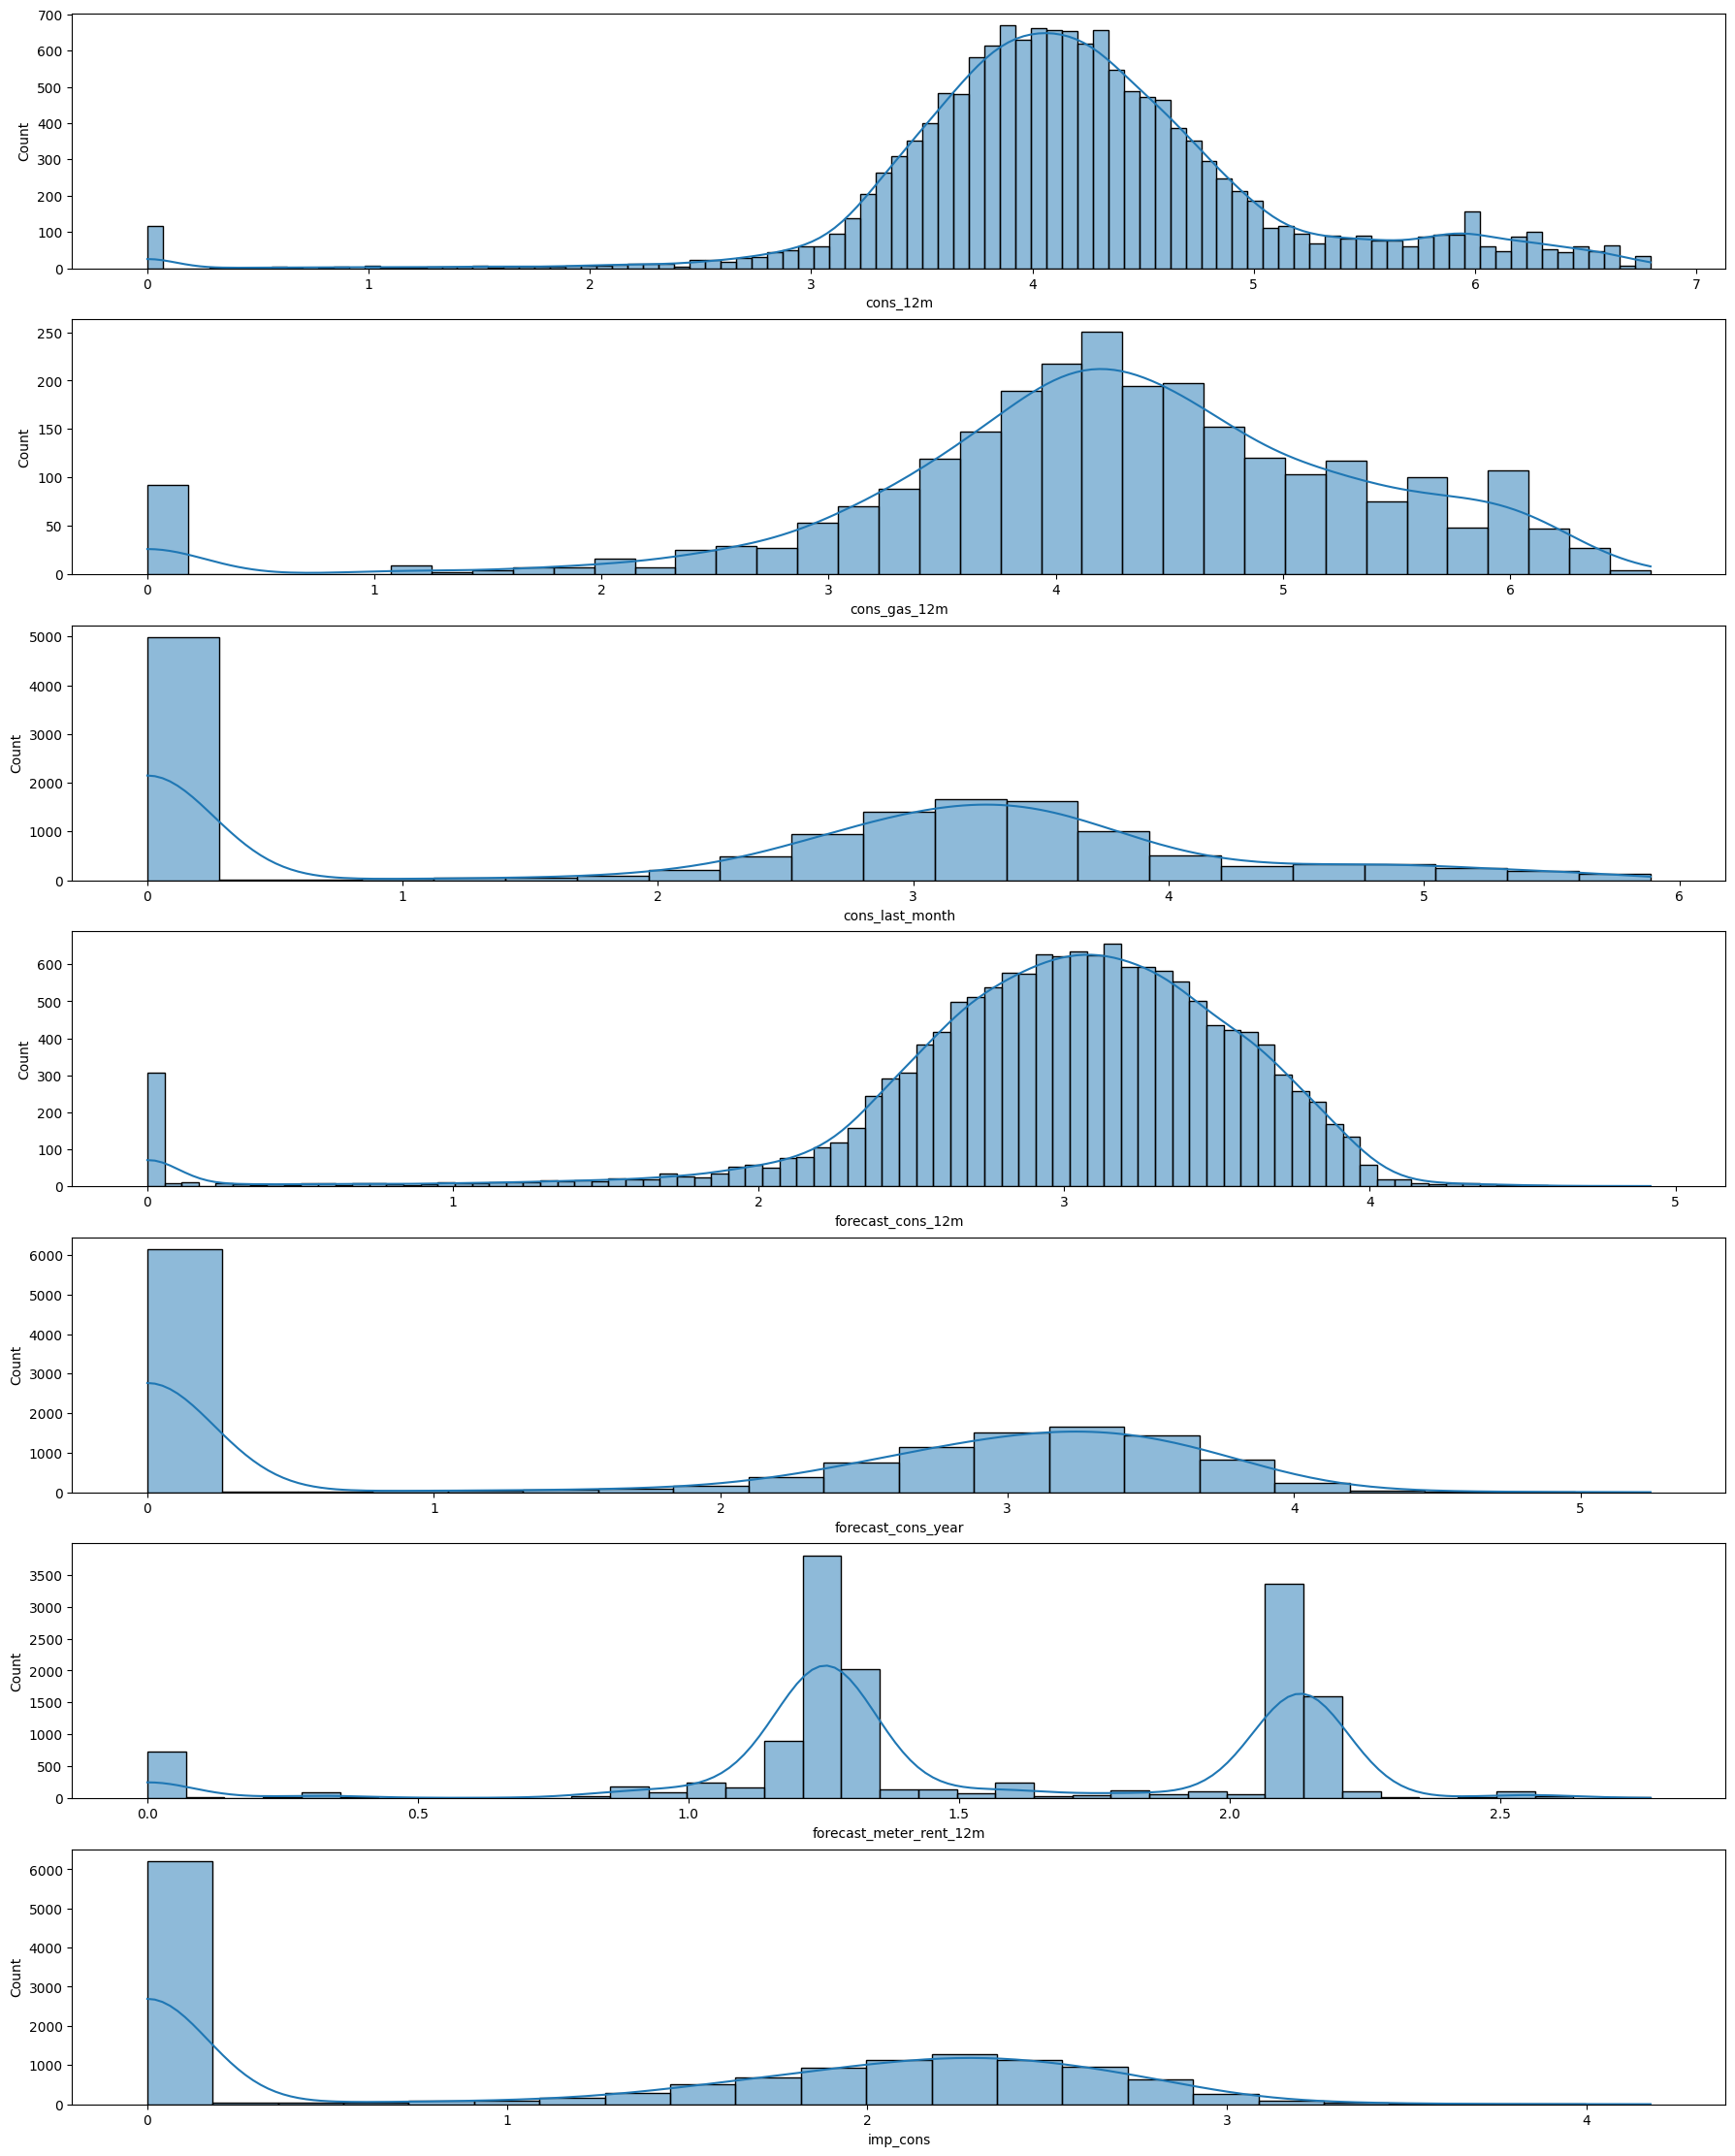

In [257]:
# Let's see how the distributions look like

fig, ax = plt.subplots(nrows=7, figsize=(22,28))
sns.histplot(df['cons_12m'], ax=ax[0], kde=True)
sns.histplot((df[df['has_gas']==1]['cons_gas_12m']), ax=ax[1], kde=True)
sns.histplot(df['cons_last_month'], ax=ax[2], kde=True)
sns.histplot(df['forecast_cons_12m'], ax=ax[3], kde=True)
sns.histplot(df['forecast_cons_year'], ax=ax[4], kde=True)
sns.histplot(df['forecast_meter_rent_12m'], ax=ax[5], kde=True)
sns.histplot(df['imp_cons'], ax=ax[6], kde=True)

In [258]:
df.describe()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
count  14606.000000  14606.000000     14606.000000       14606.000000  \
mean       4.223939      0.779244         2.264646           2.962177   
std        0.884515      1.717071         1.769305           0.683592   
min        0.000000      0.000000         0.000000           0.000000   
25%        3.754023      0.000000         0.000000           2.695477   
50%        4.149727      0.000000         2.899547           3.046836   
75%        4.610285      0.000000         3.529430           3.380716   
max        6.792889      6.618528         5.887169           4.918575   

       forecast_cons_year  forecast_discount_energy  forecast_meter_rent_12m   
count        14606.000000              14606.000000             14606.000000  \
mean             1.784610                  0.966726                 1.517203   
std              1.584986                  5.108289                 0.571481   
min              0.000000                  0.000000                 0.000000   
25%              0.000000                  0.000000                 1.235023   
50%              2.498311                  0.000000                 1.296555   
75%              3.242231                  0.000000                 2.120673   
max              5.243970                 30.000000                 2.778376   

       forecast_price_energy_off_peak  forecast_price_energy_peak   
count                    14606.000000                14606.000000  \
mean                         0.137283                    0.050491   
std                          0.024623                    0.049037   
min                          0.000000                    0.000000   
25%                          0.116340                    0.000000   
50%                          0.143166                    0.084138   
75%                          0.146348                    0.098837   
max                          0.273963                    0.195975   

       forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal   
count                 14606.000000  ...       14606.000000    14606.000000  \
mean                     43.130056  ...          34.785568        4.838217   
std                       4.485988  ...          29.758632        3.737508   
min                       0.000000  ...           0.000000        0.000000   
25%                      40.606701  ...           6.000000        2.000000   
50%                      44.311378  ...          29.000000        5.000000   
75%                      44.311378  ...          63.000000        8.000000   
max                      59.266378  ...         149.000000       29.000000   

       channel_MISS  channel_ewpa  channel_foos  channel_lmke  channel_usil   
count  14606.000000  14606.000000  14606.000000  14606.000000  14606.000000  \
mean       0.255032      0.061139      0.463508      0.126181      0.094139   
std        0.435894      0.239594      0.498684      0.332065      0.292033   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%        0.000000      0.000000      0.000000      0.000000      0.000000   
50%        0.000000      0.000000      0.000000      0.000000      0.000000   
75%        1.000000      0.000000      1.000000      0.000000      0.000000   
max        1.000000      1.000000      1.000000      1.000000      1.000000   

         origin_kam    origin_ldk    origin_lxi  
count  14606.000000  14606.000000  14606.000000  
mean       0.293989      0.215528      0.490483  
std        0.455602      0.411202      0.499927  
min        0.000000      0.000000      0.000000  
25%        0.000000      0.000000      0.000000  
50%        0.000000      0.000000      0.000000  
75%        1.000000      0.000000      1.000000  
max        1.000000      1.000000      1.000000  

[8 rows x 73 columns]

**-Checking Correlations of Variables**

- In terms of creating new features and transforming existing ones, it is very much a trial and error situation that requires iteration. Once we train a predictive model we can see which features work and don't work, we will also know how predictive this set of features is. Based on this, we can come back to feature engineering to enhance our model.

- For now, we will leave feature engineering at this point. Another thing that is always useful to look at is how correlated all of the features are within your dataset.

- This is important because it reveals the linear relationships between features. We want features to correlate with `churn`, as this will indicate that they are good predictors of it. However features that have a very high correlation can sometimes be suspicious. This is because 2 columns that have high correlation indicates that they may share a lot of the same information. One of the assumptions of any parametric predictive model (as stated earlier) is that all features must be independent.

- For features to be independent, this means that each feature must have absolutely no dependence on any other feature. If two features are highly correlated and share similar information, this breaks this assumption.

- Ideally, we want a set of features that have 0 correlation with all of the independent variables (all features except our target variable) and a high correlation with the target variable (churn). However, this is very rarely the case and it is common to have a small degree of correlation between independent features.

In [259]:
corr_cols = df.drop('id',axis=1)
corr = corr_cols.corr()

<Axes: >

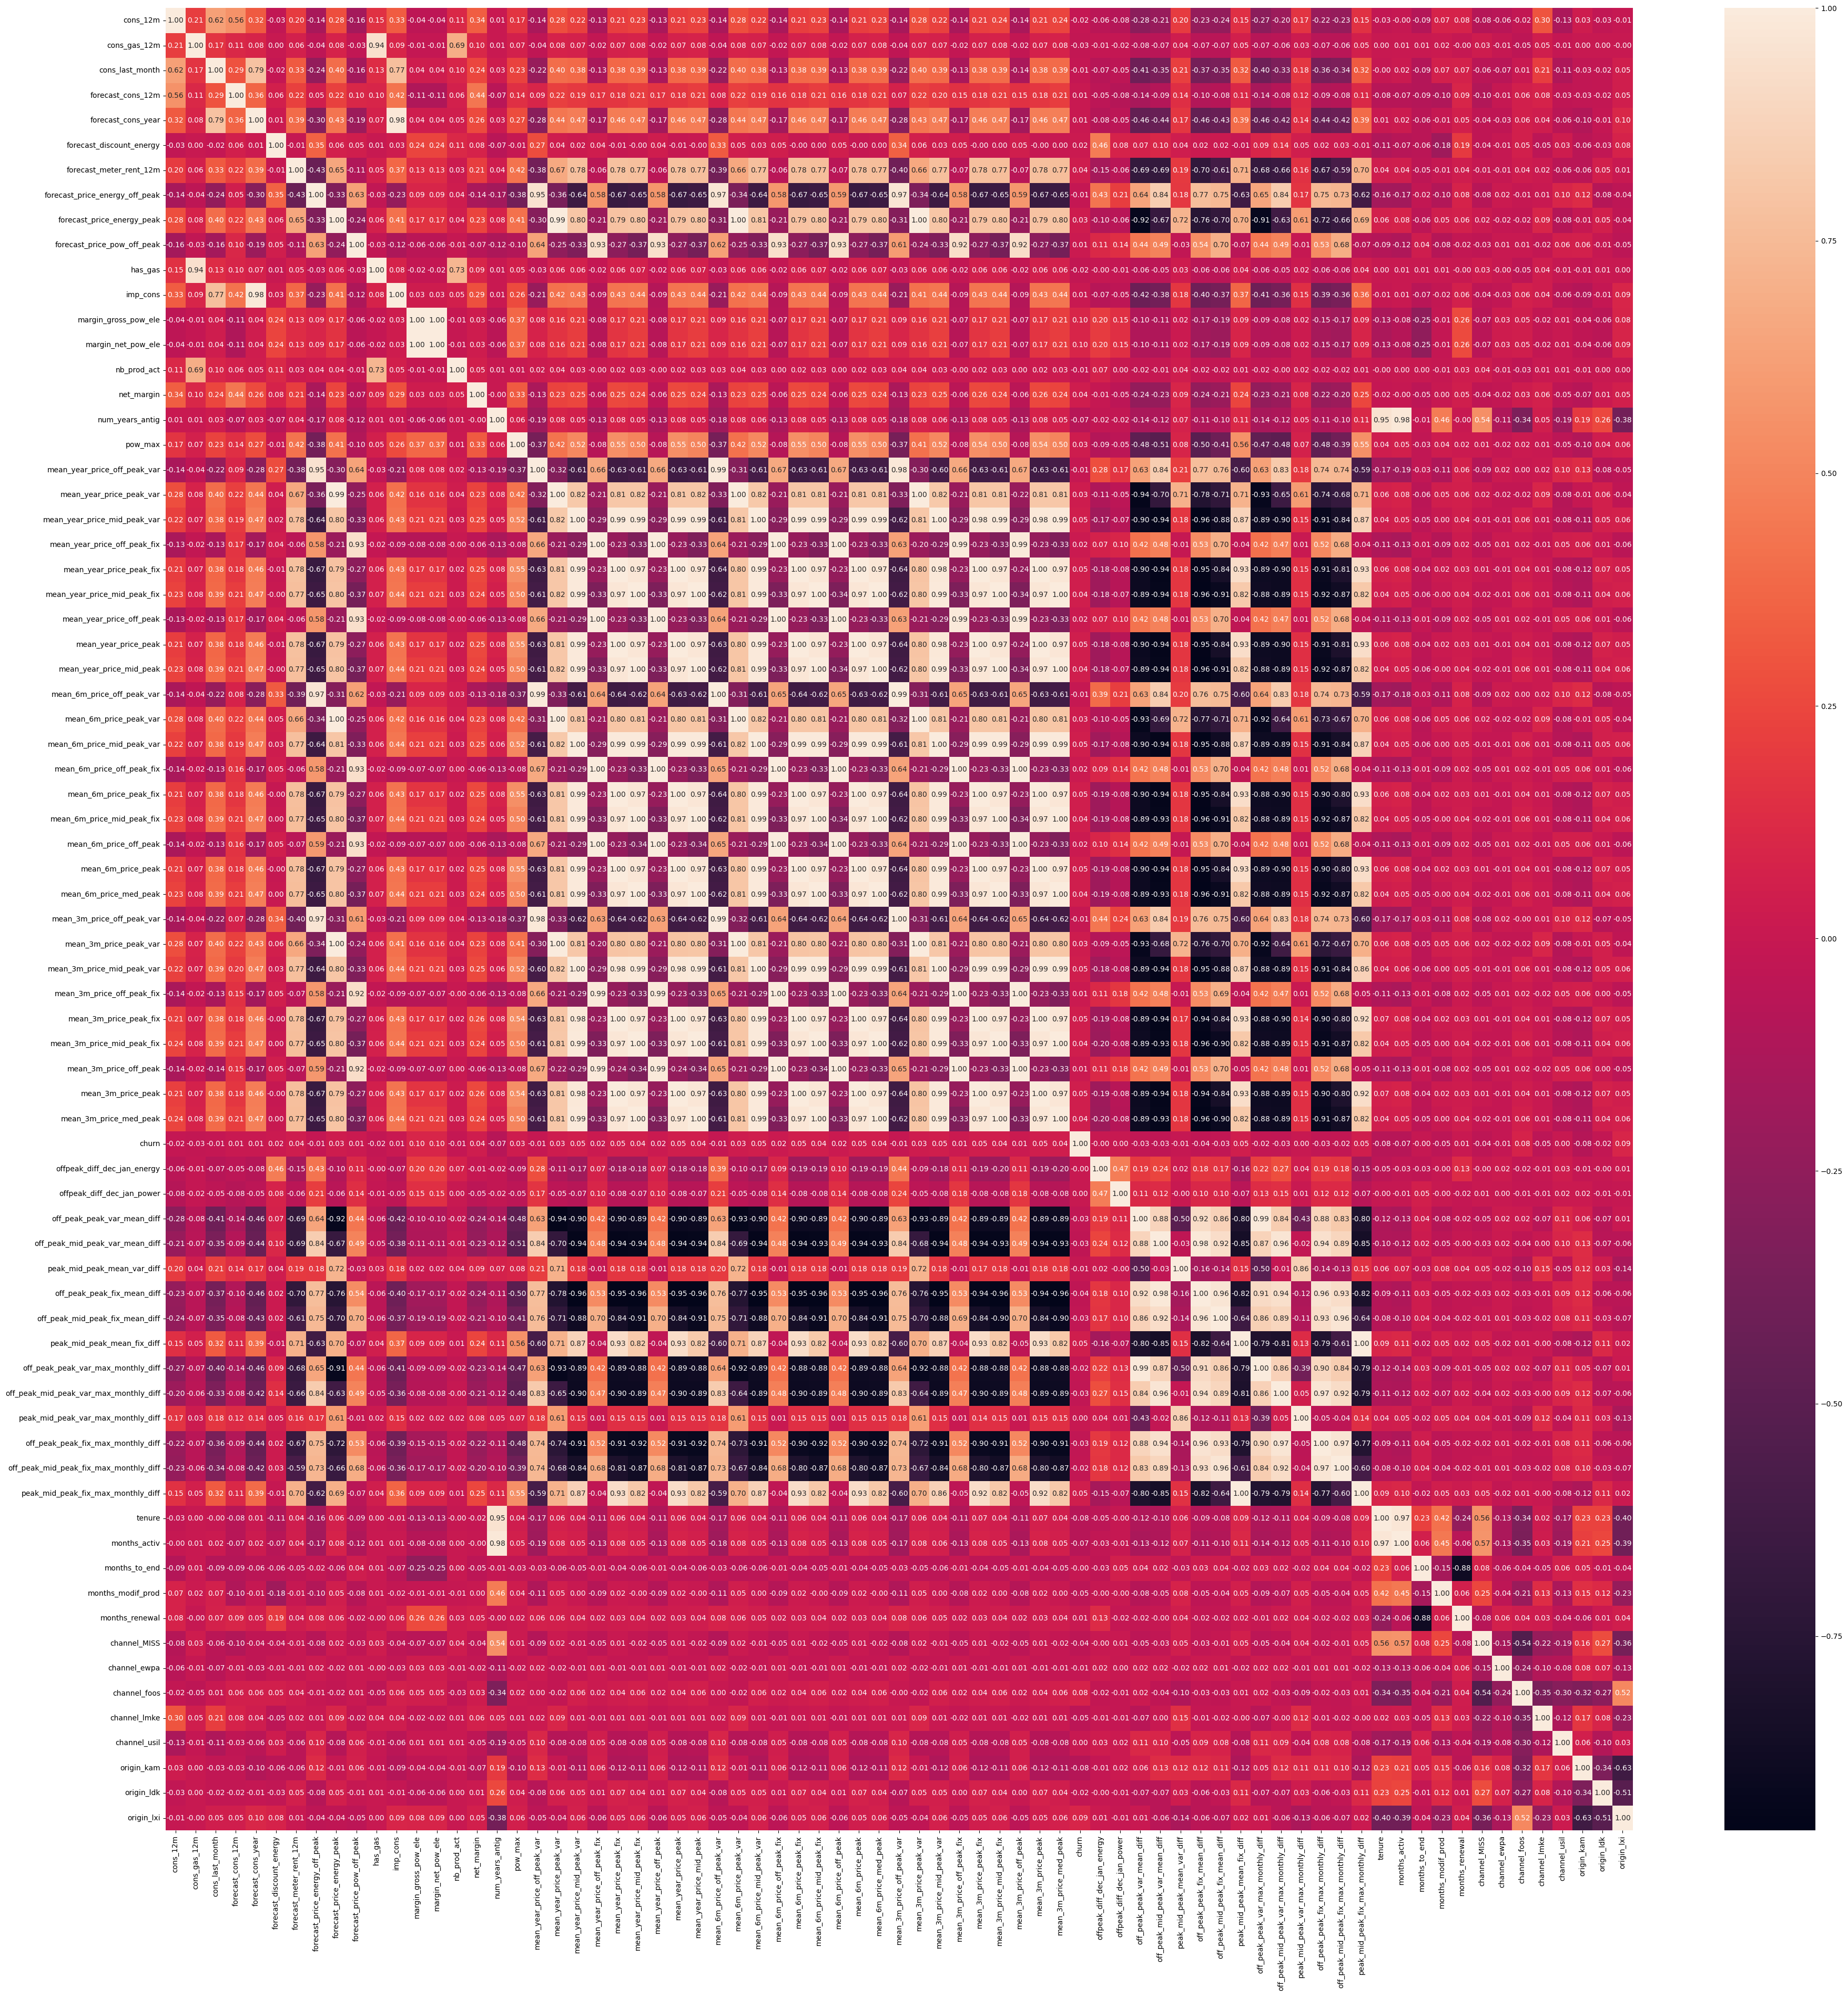

In [260]:
# Correlation Heatmap
plt.subplots(figsize=(45,45))
sns.heatmap(corr, annot=True, annot_kws={'size':10}, fmt='.2f')

=> I will remove two variables(`num_years_antig` and `forecast_cons_year`) which exhibit a high correlation with other independent features

In [261]:
df = df.drop(columns=['num_years_antig','forecast_cons_year'])
df.head()

id  cons_12m  cons_gas_12m  cons_last_month   
0  24011ae4ebbe3035111d65fa7c15bc57  0.000000      4.739944         0.000000  \
1  d29c2c54acc38ff3c0614d0a653813dd  3.668479      0.000000         0.000000   
2  764c75f661154dac3a6c254cd082ea7d  2.736397      0.000000         0.000000   
3  bba03439a292a1e166f80264c16191cb  3.200029      0.000000         0.000000   
4  149d57cf92fc41cf94415803a877cb4b  3.646011      0.000000         2.721811   

   forecast_cons_12m  forecast_discount_energy  forecast_meter_rent_12m   
0           0.000000                       0.0                 0.444045  \
1           2.280920                       0.0                 1.237292   
2           1.689841                       0.0                 1.599009   
3           2.382089                       0.0                 1.318689   
4           2.650065                       0.0                 2.122969   

   forecast_price_energy_off_peak  forecast_price_energy_peak   
0                        0.114481                    0.098142  \
1                        0.145711                    0.000000   
2                        0.165794                    0.087899   
3                        0.146694                    0.000000   
4                        0.116900                    0.100015   

   forecast_price_pow_off_peak  ...  months_modif_prod  months_renewal   
0                    40.606701  ...                  1               6  \
1                    44.311378  ...                 74               3   
2                    44.311378  ...                 67               8   
3                    44.311378  ...                 67               8   
4                    40.606701  ...                 70               9   

   channel_MISS  channel_ewpa  channel_foos  channel_lmke  channel_usil   
0             0             0             1             0             0  \
1             1             0             0             0             0   
2             0             0             1             0             0   
3             0             0             0             1             0   
4             1             0             0             0             0   

   origin_kam  origin_ldk  origin_lxi  
0           0           0           1  
1           1           0           0  
2           1           0           0  
3           1           0           0  
4           1           0           0  

[5 rows x 72 columns]

### **Building Predictive Model**

---

**1. Spliting Data**

- Our dataset should initially be divided into training and test samples. We do this in order to imitate a real-world scenario by making predictions for our test sample without revealing these data points to the predictive model. This allows us to assess how effectively our model generalises to new data, which is essential.

In [262]:
data_model = df.copy(deep=True)
X = data_model.drop(columns=['id','churn'])
y = data_model['churn']

**Handling imbalanced data**

- Imbalanced classification involves developing predictive models on classification datasets that have a severe class imbalance.

- As we saw in the previous task, the target column (`churn` column) has a imbalanced data, with more than 90% of customers not churning (class 0) and almost 10% of customers churning (class 1).

- The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

- One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class, although these examples don’t add any new information to the model. Instead, new examples can be synthesized from the existing examples. This is a type of data augmentation for the minority class and is referred to as the Synthetic Minority Oversampling Technique, or SMOTE for short.

In [263]:
from imblearn.over_sampling import SMOTE
sm = SMOTE(random_state=24)
X_new, y_new = sm.fit_resample(X, y)

Next we will split the data into `training` and `test` data. The percentages of each test can be changed but a 75%-25% is a good ratio 

In [264]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_new, y_new, test_size=0.25, random_state=24)

---

**2. Modelling**

In [265]:
#classifiation by LogisticRegression
from sklearn.linear_model import LogisticRegression
Reg = LogisticRegression()
Reg.fit(X_train, y_train)
y_pred1 = Reg.predict(X_test)

c:\Users\user\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [266]:
#classification by RandomForest
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier()
RF.fit(X_train, y_train)
y_pred2 = RF.predict(X_test)

In [267]:
#classification by LightGBM
import lightgbm as lgb
Lig = lgb.LGBMClassifier()
Lig.fit(X_train, y_train)
y_pred3 = Lig.predict(X_test)

---

**3. Model Evaluation**

Now let's evaluate how well this trained model is able to predict the values of the test dataset

We are going to use 3 metrics to evaluate performance of models:
- Accuracy, Precision, Recall
- Confusion Matrix
- ROC-AUC

In [268]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score

**- Logistics Regression Model**

In [269]:
print("\n --- Logistics Regression Model --- \n")
print(classification_report(y_test, y_pred1))


 --- Logistics Regression Model --- 

              precision    recall  f1-score   support

           0       0.77      0.81      0.79      3338
           1       0.80      0.75      0.77      3256

    accuracy                           0.78      6594
   macro avg       0.78      0.78      0.78      6594
weighted avg       0.78      0.78      0.78      6594



Text(0.5, 23.52222222222222, 'Predict')

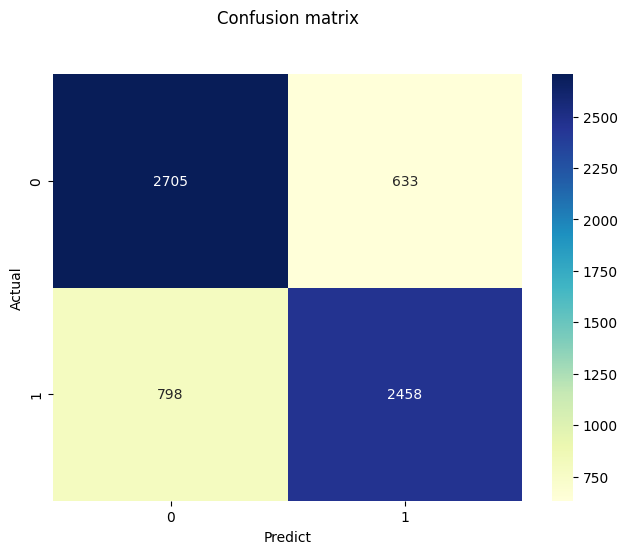

In [270]:
cnf_matrix = confusion_matrix(y_test, y_pred1)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

**- Random Forest Model**

In [271]:
print("\n --- Random Forest Model --- \n")
print(classification_report(y_test, y_pred2))


 --- Random Forest Model --- 

              precision    recall  f1-score   support

           0       0.93      0.98      0.95      3338
           1       0.98      0.92      0.95      3256

    accuracy                           0.95      6594
   macro avg       0.95      0.95      0.95      6594
weighted avg       0.95      0.95      0.95      6594



Text(0.5, 23.52222222222222, 'Predict')

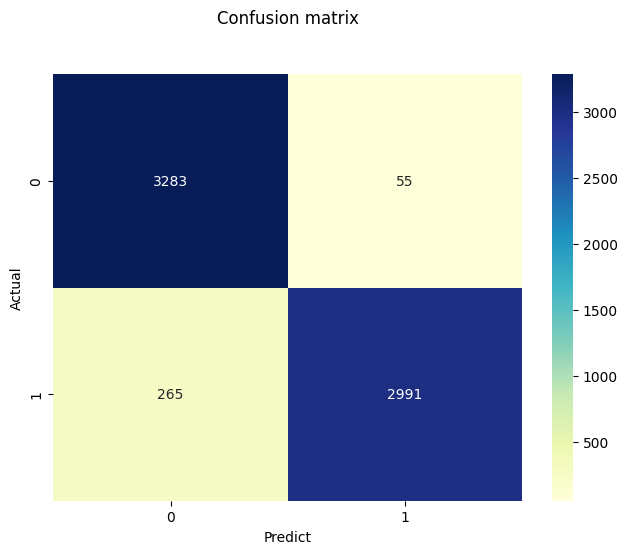

In [272]:
cnf_matrix = confusion_matrix(y_test, y_pred2)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

**- LightGBM Model**

In [273]:
print("\n --- LightGBM Model --- \n")
print(classification_report(y_test, y_pred3))


 --- LightGBM Model --- 

              precision    recall  f1-score   support

           0       0.91      0.99      0.95      3338
           1       0.98      0.90      0.94      3256

    accuracy                           0.94      6594
   macro avg       0.95      0.94      0.94      6594
weighted avg       0.95      0.94      0.94      6594



In [274]:
cnf_matrix = confusion_matrix(y_test, y_pred3)
class_names = [0,1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual')
plt.xlabel('Predict')

Text(0.5, 23.52222222222222, 'Predict')

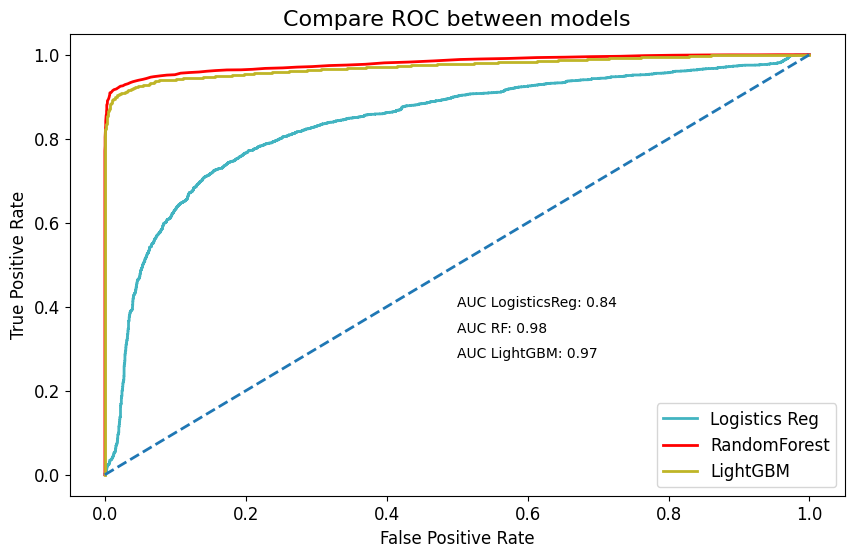

In [275]:
#ploting ROC_AUC for models on test set
from sklearn.metrics import roc_curve

plt.figure(figsize=(10,6))
#ploting ROC of Logistics Regression
y_prob1 = Reg.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob1)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color='#42b4c1', label='Logistics Reg')
plt.text(0.5,0.4,'AUC LogisticsReg: {:.2f}'.format(roc_auc_score(y_test,y_prob1)),size= 10)

y_prob2 = RF.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob2)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color='red', label='RandomForest')
plt.text(0.5,0.34,'AUC RF: {:.2f}'.format(roc_auc_score(y_test,y_prob2)),size= 10)

#ploting ROC of LightGBM
y_prob3 = Lig.predict_proba(X_test)[:,-1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_test, y_prob3)
plt.plot(false_positive_rate, true_positive_rate, linewidth=2, color='#bfb527',label='LightGBM')
plt.text(0.5,0.28,'AUC LightGBM: {:.2f}'.format(roc_auc_score(y_test,y_prob3)),size= 10)

plt.plot([0,1], ls='--', linewidth=2)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.xlabel('False Positive Rate', fontsize=12)
plt.ylabel('True Positive Rate', fontsize=12)
plt.title('Compare ROC between models', fontsize=16)
plt.legend(prop={'size':12}, loc='lower right')

---

**4. Model Understanding**

- Examining feature_importances is a quick and easy way to comprehend a model's findings. There are several ways to calculate feature importance, however using the `Random Forest classifier` and `LightGBM Classifier`, we are able to extract feature_importances using the built-in approach on the trained model. feature_importances reflect the importance of a feature within the prediction model.

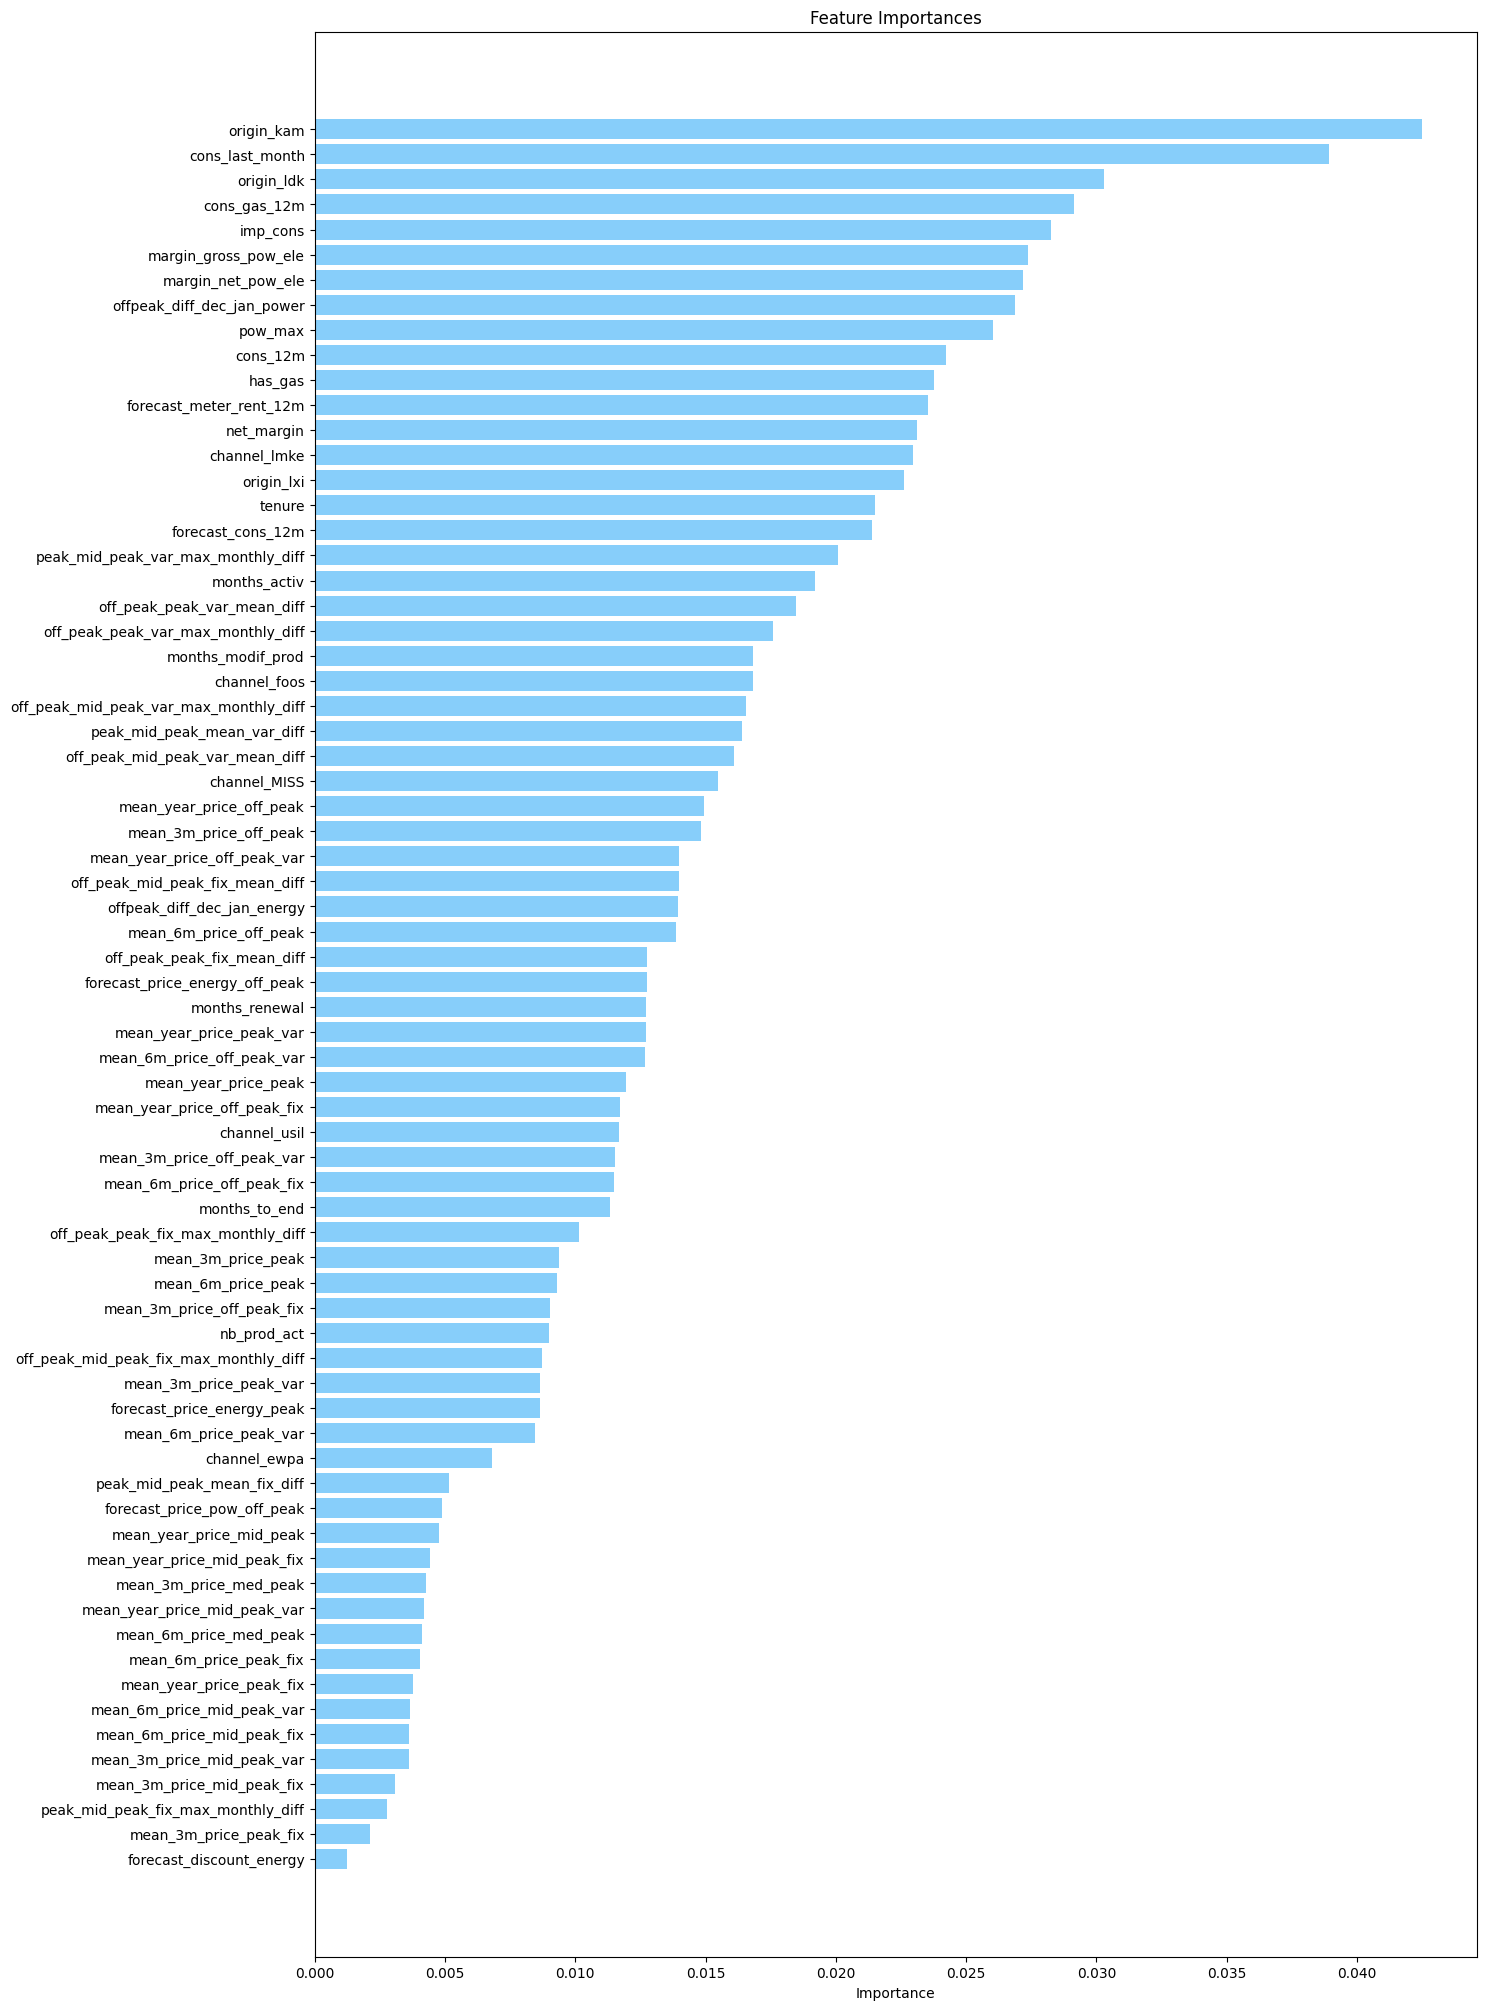

In [276]:
#Feature importance of RandomForest Model
feature_importances = pd.DataFrame({
    'features': X.columns,
    'importance': RF.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances)), feature_importances['importance'], color='lightskyblue', align='center')
plt.yticks(range(len(feature_importances)), feature_importances['features'])
plt.xlabel('Importance')
plt.show()

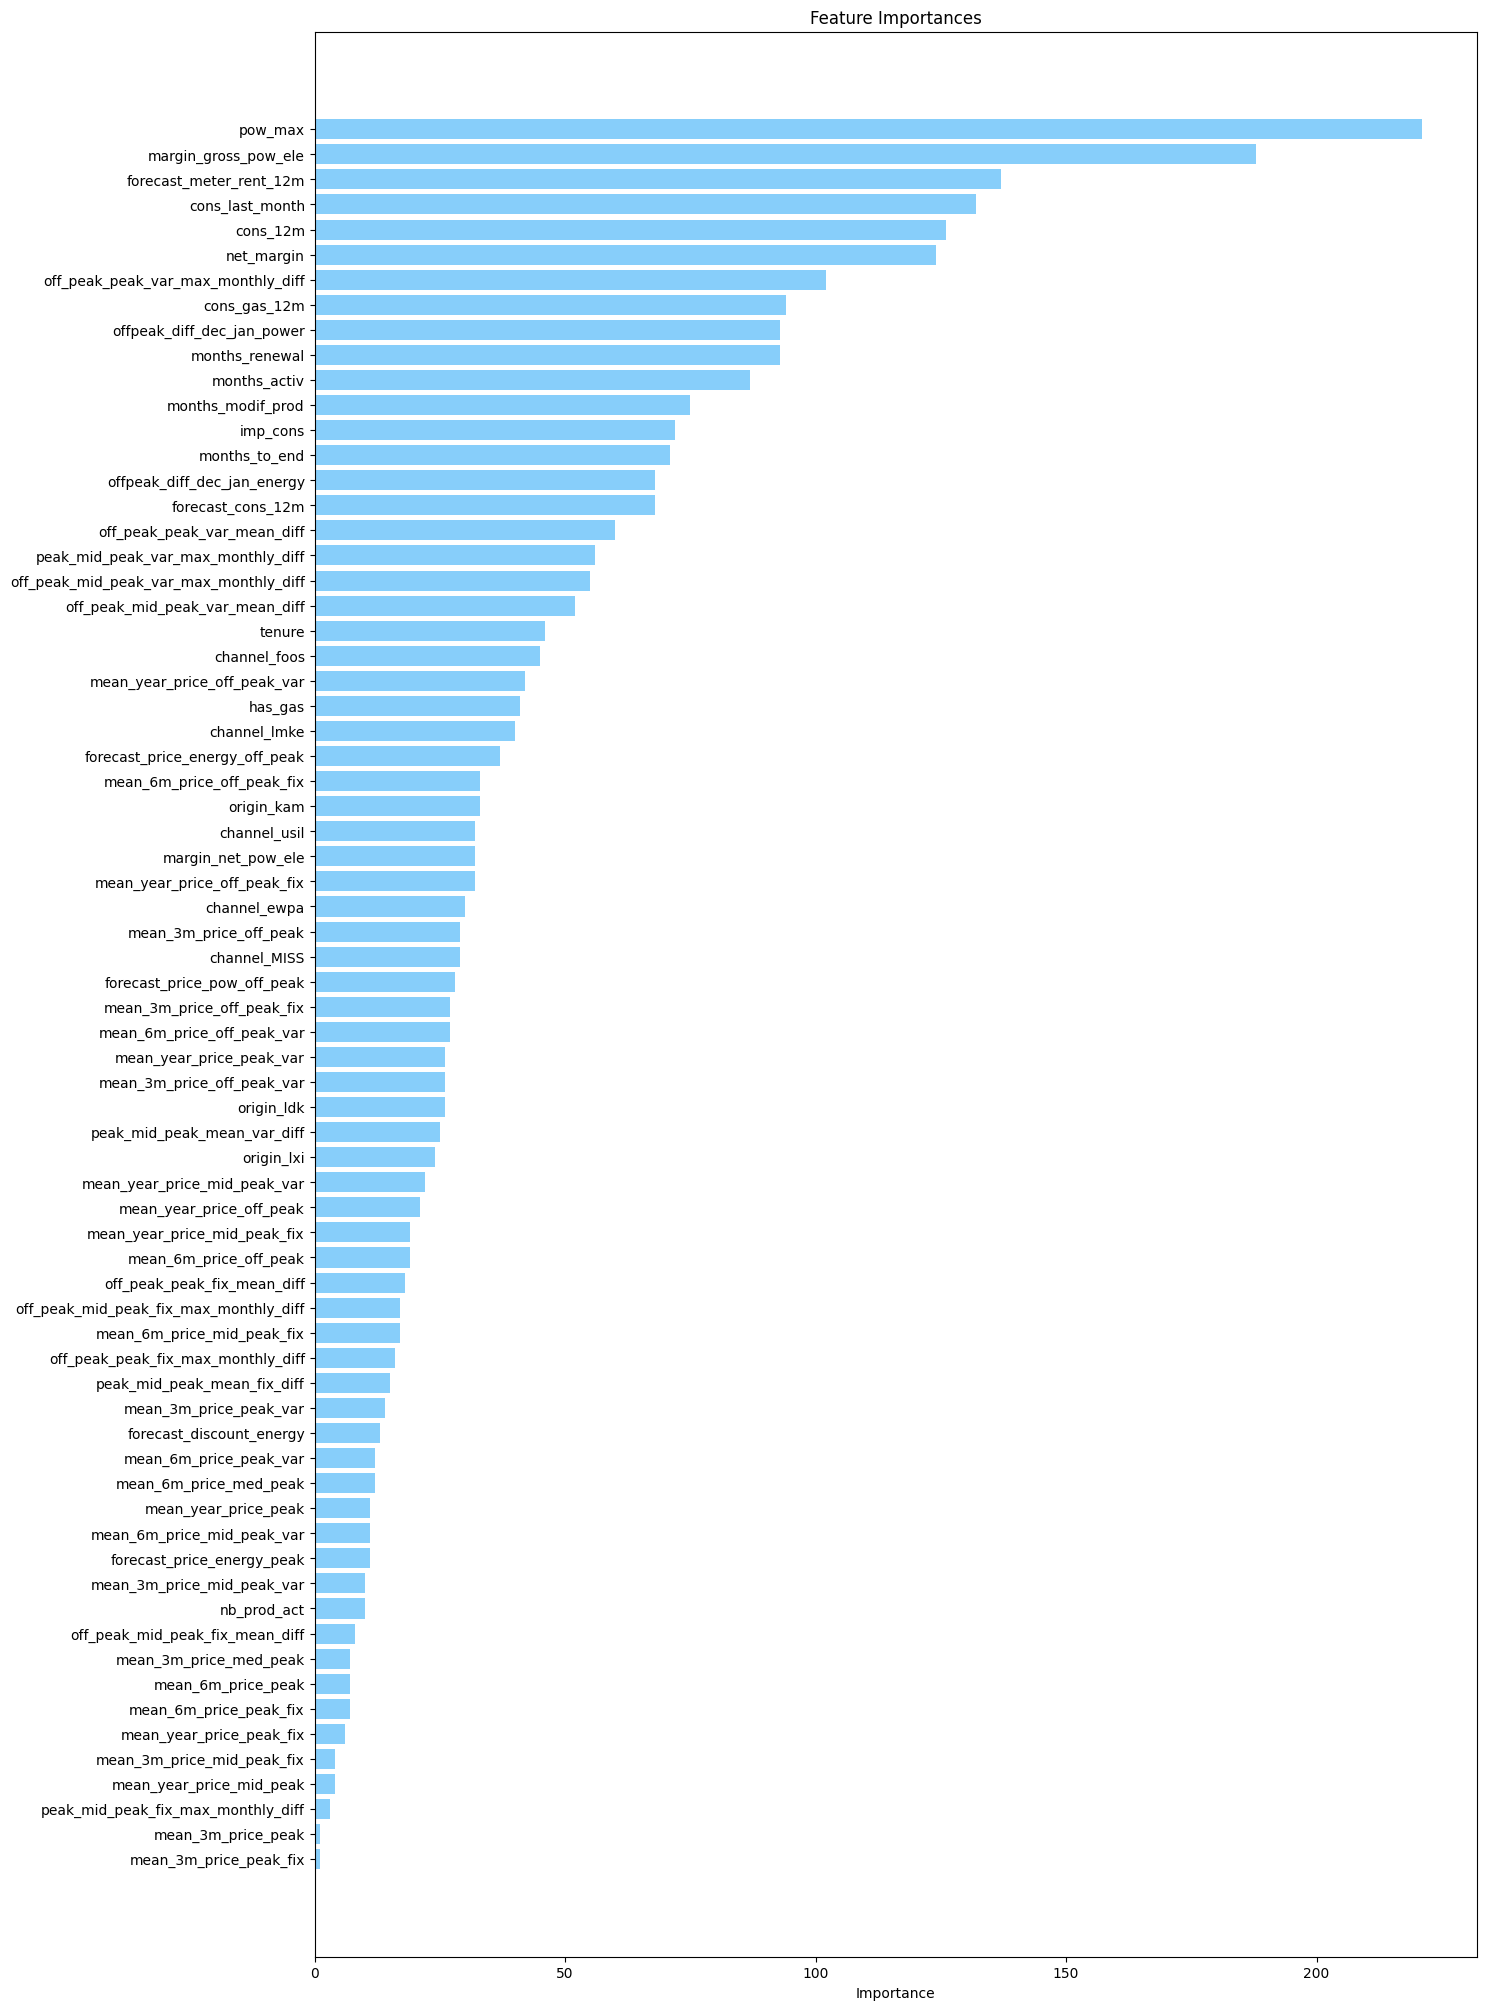

In [277]:
#feature importance of LightGBM Model
feature_importances1 = pd.DataFrame({
    'features': X.columns,
    'importance': Lig.feature_importances_
}).sort_values(by='importance', ascending=True).reset_index()

plt.figure(figsize=(15, 25))
plt.title('Feature Importances')
plt.barh(range(len(feature_importances1)), feature_importances1['importance'], color='lightskyblue', align='center')
plt.yticks(range(len(feature_importances1)), feature_importances1['features'])
plt.xlabel('Importance')
plt.show()

The features have different importance in different models. From the chart of LightGBM model, we can observe the following points:

- Subscribed power and Gross margin on power subscription is a top driver for churn in this model.

- Forecasted bill of meter rental for the next 12 months also is an influential drive.

- Time seems to be an influential factor, especially the number of months they have been active, their tenure and the number of months since they updated their contract.

- The features that our colleague recommended is in the top half in terms of how influential it is and some of the features built off the back of this actually outperform it.

- Our price sensitivity features are scattered around but are not the main driver for customer churning.

=> Based on the output of the feature importances, it is not main driver but it is a weak contributor. However, to arrive at a conclusive result, more experimentation is needed.

In [278]:
proba_predictions = Lig.predict_proba(X_test)
probabilities = proba_predictions[:, 1]

In [279]:
X_test = X_test.reset_index(drop=True)

In [280]:
X_test['churn'] = y_pred3.tolist()
X_test['churn_probability'] = probabilities.tolist()

In [281]:
X_test.to_csv('predicted_data.csv')

---

## 4. Business impact of discount

We conduct a brief analysis of the strategy that the SME division head proposed. This is not necessarily the optimal strategy!

The SME division head proposed that we give a 20% discount to high propensity to churn customers. We can assume to start that everyone who is offered a discount will accept it.

**Workflow**

Our task is to calculate the forecast revenue for the set of customers:
- 1. When no discount is offered, and

- 2. When a discount is offered based on a probability cut-off to decide who should receive a discount of 20%.

And hence to decide where the cut-off should be set in order to maximize revenue.

In [282]:
test_data = pd.read_csv(r'C:\Users\user\OneDrive\Máy tính\Personal Project\BCG Gamma\Task 3 - Feature Engineering & Modelling\predicted_data.csv')
test_data.drop(test_data.columns[0],axis=1,inplace=True)
test_data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
0  4.737137      4.344825         3.835380           3.752773  \
1  4.488454      0.000000         3.464022           3.523230   
2  4.037710      0.000000         2.965462           3.051048   
3  4.501155      0.000000         0.000000           3.671806   
4  4.953412      0.000000         3.858293           3.963927   

   forecast_discount_energy  forecast_meter_rent_12m   
0                  0.000000                 2.145482  \
1                  0.000000                 2.132190   
2                  8.250409                 2.130291   
3                  0.000000                 1.306639   
4                  0.000000                 2.168887   

   forecast_price_energy_off_peak  forecast_price_energy_peak   
0                        0.115839                    0.099290  \
1                        0.117280                    0.100609   
2                        0.127336                    0.109002   
3                        0.143801                    0.000000   
4                        0.114255                    0.097649   

   forecast_price_pow_off_peak  has_gas  ...  channel_MISS  channel_ewpa   
0                    40.606701        1  ...             0             0  \
1                    40.606701        0  ...             0             0   
2                    40.743795        0  ...             0             0   
3                    44.311378        0  ...             1             0   
4                    40.606701        0  ...             0             0   

   channel_foos  channel_lmke  channel_usil  origin_kam  origin_ldk   
0             1             0             0           0           0  \
1             0             0             0           0           0   
2             1             0             0           0           0   
3             0             0             0           0           1   
4             1             0             0           0           0   

   origin_lxi  churn  churn_probability  
0           1      1           0.965553  
1           1      1           0.997472  
2           1      1           0.968871  
3           0      0           0.068249  
4           1      1           0.981402  

[5 rows x 72 columns]

**- Calculating a baseline revenue estimate (no intervention)**

- Calculate a baseline estimate of the electricity revenue for every customer for the next twelve months based on the forecast consumption and forecast price and actual churn outcome. Call this `basecase_revenue`.

- For customers who end up churning, we should reduce our forecast revenue calculation by 91.9% to account for the customers churn some time between January 2016 and the start of March 2016. (Not knowing when they churn, a reasonable assumption for the lost revenue is the average of 100%, corresponding to churn on 1 January 2016, and 83.9%, corresponding to churn at the end of February, or 59 days into a 365 day year). Call this new variable `basecase_revenue_after_churn`, i.e `basecase_revenue_after_churn = basecase_revenue(1 -0.919 churn)`

In [283]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent,
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step
test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m'])+1) * test_data['forecast_price_energy_off_peak'] + \
                                (np.power(10, test_data['forecast_meter_rent_12m'])+1)

# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn'])

In [284]:
test_data.head()

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
0  4.737137      4.344825         3.835380           3.752773  \
1  4.488454      0.000000         3.464022           3.523230   
2  4.037710      0.000000         2.965462           3.051048   
3  4.501155      0.000000         0.000000           3.671806   
4  4.953412      0.000000         3.858293           3.963927   

   forecast_discount_energy  forecast_meter_rent_12m   
0                  0.000000                 2.145482  \
1                  0.000000                 2.132190   
2                  8.250409                 2.130291   
3                  0.000000                 1.306639   
4                  0.000000                 2.168887   

   forecast_price_energy_off_peak  forecast_price_energy_peak   
0                        0.115839                    0.099290  \
1                        0.117280                    0.100609   
2                        0.127336                    0.109002   
3                        0.143801                    0.000000   
4                        0.114255                    0.097649   

   forecast_price_pow_off_peak  has_gas  ...  channel_foos  channel_lmke   
0                    40.606701        1  ...             1             0  \
1                    40.606701        0  ...             0             0   
2                    40.743795        0  ...             1             0   
3                    44.311378        0  ...             0             0   
4                    40.606701        0  ...             1             0   

   channel_usil  origin_kam  origin_ldk  origin_lxi  churn  churn_probability   
0             0           0           0           1      1           0.965553  \
1             0           0           0           1      1           0.997472   
2             0           0           0           1      1           0.968871   
3             0           0           1           0      0           0.068249   
4             0           0           0           1      1           0.981402   

   basecase_revenue  basecase_revenue_after_churn  
0        796.490814                     64.515756  
1        527.945567                     42.763591  
2        279.332607                     22.625941  
3        696.814090                    696.814090  
4       1200.127870                     97.210357  

[5 rows x 74 columns]

**- Calculate the estimated benefits and costs of intervention**

Now, pick a cut-off probability (e.g 0.5) so that:

- Customers with a higher churn probability than the cut-off get a discount, and
- Customers below the churn-probability get a discount.

From this, calculate the revenue of the intervention scenario of this scenario assuming:

- All customers who are offered a discount accept it.
- Customers who do receive a discount are are assumed not to churn in the next twelve months (i.e churn probability = 0), and therefore the retained revenue is `0.8basecase_revenue`, being (1-discount_fraction)basecase_revenue.
- Customers who do not receive a discount are assumed to churn based on the observed dependent variable (ie, a 1 or 0 for whether they actually churned or not).

Now, map out the revenue delta as a function of the cut-off probability in a graph.

What cut-off probability approximately optimises the revenue outcome?

Assume for these calculations that the customer does not consume more or less electricity because the price changes (In practice, we would expect that if the customer's cost goes down then their consumption might increase)

We will see two counterbalancing effects at play:

- For true positives, we will see revenue retention vs the no-discount scenario.
- For false positive, we will see reduced revenue from giving them a discount when they wouldn't in fact churn.

(False negatives represent an opportunity cost but not an actual cost difference between the two scenarios.)

The optimal cut-off point will balance the benefits from true positives against the costs of false positives. Our task is to approximately find the optimal cut-off point. We may need to make additional assumptions. If we feel the assumptions above aren't justified and that others are better then we should modify our assumptions.

In [285]:
def get_rev_delta(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2) -> float:
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']

    # Churn predicted => discount is given => customer stay for full year, independent of whether the prediction
    # (false positive, "free/unnecessary discount given") or correct.
    pred.loc[pred['churn_probability'] >= cutoff, 'discount_revenue'] = pred['basecase_revenue'] * (1-discount)

    # Save the revenue delta for each customer in a separat column
    pred['revenue_delta'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta'].sum()


In [286]:
# Generate a list of possible cutoffs and the corresponding overall revenue detals
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})

def plot_tradeoff(rev_deltas: pd.Series):
    #Plot the revenue deltas
    rev_deltas.plot()
    #Mark optimal point
    max_pred = rev_deltas.idxmax()
    plt.scatter(max_pred, rev_deltas.loc[max_pred], s=100, c='orange')
    #Reference line for break-even
    plt.hlines(0,0,1)
    plt.show()
    print(f'Maximum benefit at cutoff {max_pred} with revenue delta of ${rev_deltas.loc[max_pred]:,.2f}')

plot_tradeoff(rev_deltas)

Maximum benefit at cutoff 0.5 with revenue delta of $694,473.20


**-Optional extra: How to select the cut-off?**

Above, we decided who to offer the discount to based on a probability cut-off.

Is this the optimal strategy?

- For instance, we might be offering discounts to customers who are not very profitable, thus worsening our overall margins substantially. For example, if offering a discount makes the customer unprofitable on a net margin basis then we might want to let them churn rather than save them.
- Even if we only consider revenue, this strategy might not be optimal from a revenue viewpoint. For instance, we can calculate the expected revenue impact of our strategy and prioritise customers for discounts that have a high expected revenue impact. (This means that the probability of churn might be high but they also might be valuable customers).

A general principle here is that we can afford to spend more on retaining high-value customers because the costs of losing them are higher.

=> A very common mistake in business applications of churn is to focus on the churn probability whilst forgetting the value impact (to greater or lesser extents). We have seen many cases where our clients spend as much effort on retaining unprofitable customers as they do on retaining highly profitable customers.

In [287]:
def get_rev_delta_high_value(pred: pd.DataFrame, cutoff: float=0.5, discount: float=0.2, min_rev: float=500):
    """
    Get the delta of revenues for offering discount for all customers with predicted churn risk >= cutoff and
    basecase_revenue > min_rev
    """
    pred['discount_revenue'] = pred['basecase_revenue_after_churn']
    # Churn predicted => discount is given for high-value customers => customer stays for full year, independent
    # (false positive, "free"/unnecessary discount given) or correct
    pred.loc[(pred['churn_probability'] >= cutoff) & (pred['basecase_revenue'] > min_rev),'discount_revenue'] = pred['basecase_revenue'] * (1 - discount)
    # Save the revenue delta for each customer in a separate column
    pred['revenue_delta_higher'] = pred['discount_revenue'] - pred['basecase_revenue_after_churn']
    return pred['revenue_delta_higher'].sum()

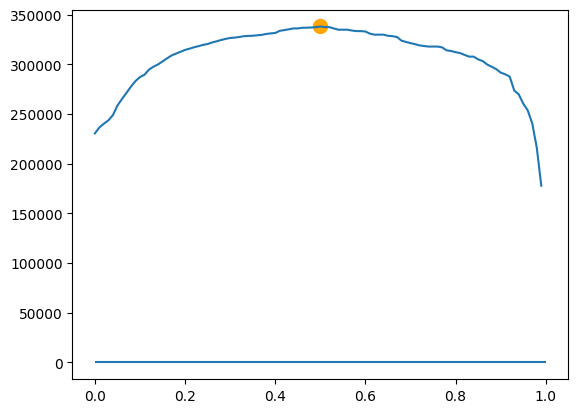

Maximum benefit at cutoff 0.5 with revenue delta of $338,261.23


In [288]:
rev_deltas = pd.Series({cutoff: get_rev_delta_high_value(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
# Generate a list of possible cutoffs and the corresponding overall revenue deltas
plot_tradeoff(rev_deltas)

*Note*:

- In this case, it doesn't make sense to prioritize large-revenue customers, since the overall revenue delta is much lower than when targeting everyone. However, this is only the case here since the intervention doesn't depend on the number of customers (simply adjusting prices). The interventions usually go beyond simply adjusting prices to prevent churn.

- There may be the option of intensifying the customer relation, adding key account managers, or other interventions that do incur costs depending on how many customers are targeted. In that case, it may be benefitial to target only a subset of customers to save on these costs, even if the delta in the figure above is reduced.

In [289]:
a = pd.DataFrame(y_test)
a = a.rename(columns={'churn':'actuall_churn'}).reset_index(drop=True)

In [290]:
test_data1 = pd.concat([test_data,a],axis=1)
test_data1

cons_12m  cons_gas_12m  cons_last_month  forecast_cons_12m   
0     4.737137      4.344825         3.835380           3.752773  \
1     4.488454      0.000000         3.464022           3.523230   
2     4.037710      0.000000         2.965462           3.051048   
3     4.501155      0.000000         0.000000           3.671806   
4     4.953412      0.000000         3.858293           3.963927   
...        ...           ...              ...                ...   
6589  4.289592      0.000000         1.447221           3.151008   
6590  4.279325      0.000000         3.588272           3.274507   
6591  3.687325      0.000000         0.498358           2.678608   
6592  4.484516      0.000000         3.346273           3.337931   
6593  3.804120      0.000000         2.740955           2.795882   

      forecast_discount_energy  forecast_meter_rent_12m   
0                     0.000000                 2.145482  \
1                     0.000000                 2.132190   
2                     8.250409                 2.130291   
3                     0.000000                 1.306639   
4                     0.000000                 2.168887   
...                        ...                      ...   
6589                  0.000000                 1.094556   
6590                  0.000000                 0.000000   
6591                  0.000000                 1.275326   
6592                  0.000000                 2.133263   
6593                  0.000000                 2.161555   

      forecast_price_energy_off_peak  forecast_price_energy_peak   
0                           0.115839                    0.099290  \
1                           0.117280                    0.100609   
2                           0.127336                    0.109002   
3                           0.143801                    0.000000   
4                           0.114255                    0.097649   
...                              ...                         ...   
6589                        0.162806                    0.000000   
6590                        0.114015                    0.097125   
6591                        0.146166                    0.000000   
6592                        0.115867                    0.100052   
6593                        0.115173                    0.098842   

      forecast_price_pow_off_peak  has_gas  ...  origin_ldk  origin_lxi   
0                       40.606701        1  ...           0           1  \
1                       40.606701        0  ...           0           1   
2                       40.743795        0  ...           0           1   
3                       44.311378        0  ...           1           0   
4                       40.606701        0  ...           0           1   
...                           ...      ...  ...         ...         ...   
6589                    45.018423        0  ...           0           0   
6590                    40.606701        0  ...           0           1   
6591                    45.618490        0  ...           0           1   
6592                    40.606701        0  ...           0           1   
6593                    40.609341        0  ...           0           1   

      churn  churn_probability  basecase_revenue   
0         1           0.965553        796.490814  \
1         1           0.997472        527.945567   
2         1           0.968871        279.332607   
3         0           0.068249        696.814090   
4         1           0.981402       1200.127870   
...     ...                ...               ...   
6589      1           0.989311        244.099162   
6590      0           0.186521        216.634378   
6591      1           0.982336         89.732300   
6592      1           0.987739        389.314436   
6593      1           0.989555        218.161369   

      basecase_revenue_after_churn  discount_revenue  revenue_delta   
0                        64.515756         64.515756       0.00000

**- Optional extra: Using forecast rather than actual churn**

We may have noticed above that we used actual churn outcomes in calculating the financial impact. Actual churn outcomes are fine if we know them and are conducting a retrospective analysis of the effectiveness of a strategy. This example of analysis is commonly known as "backtesting", ie seeing how well a strategy would have performed historically.

Of course, one must be careful that any analysis is done using out-of-sample data. Conducting the analysis on the training data will lead to predictions that are too optimistic.

In practice, actual outcomes may not be available because they are in the future. An alternative is to optimise predicted/forecast revenue based on the probabilities which are an output from our churn model. In this case, we would replace the actual churn outcomes (churn) with the predicted probability of churn from our model. The results here are obviously model-dependent.

If our model probabilities are poorly calibrated then we can end up with quite poor results from this. Going down this path therefore usually requires the extra step of checking how well calibrated the model probabilities are, and potentially correcting for any miscalibration using Platt scaling, sigmoid calibration or isotonic regression.

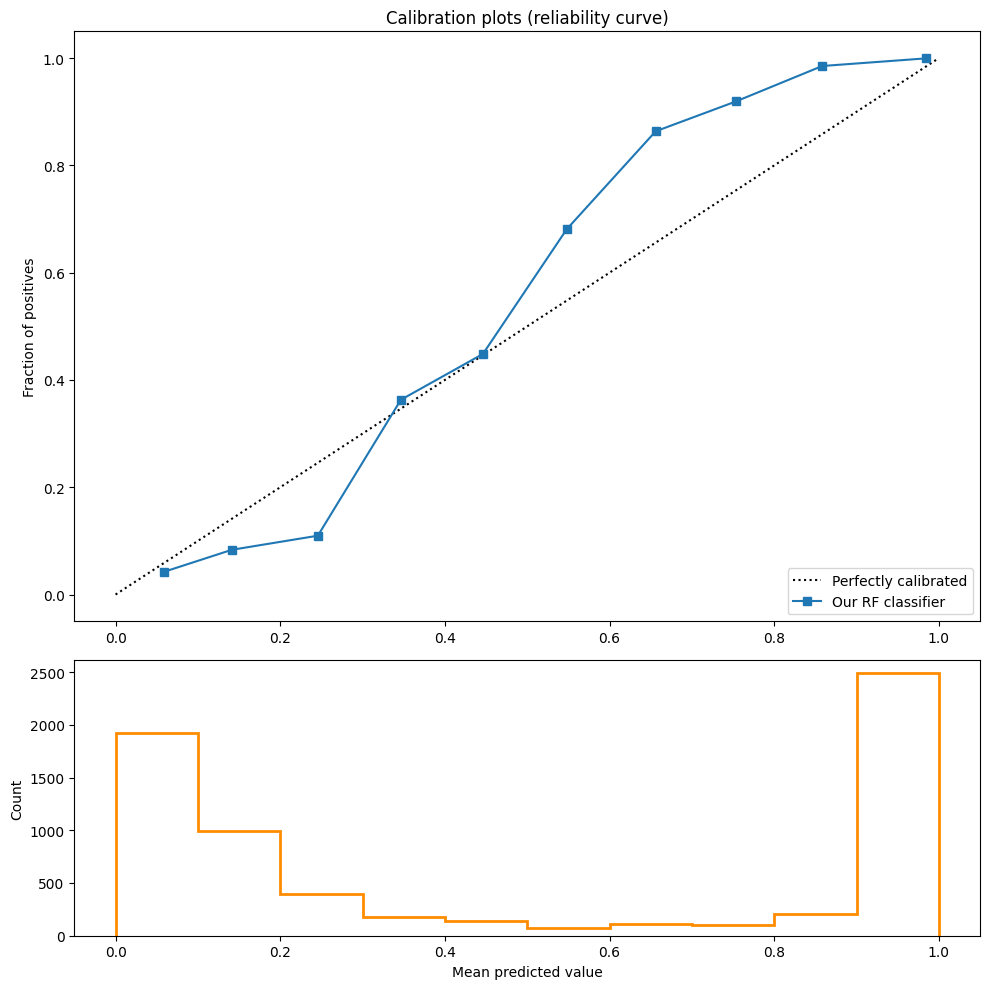

In [291]:
# Check our calibration

from sklearn.calibration import calibration_curve

fig = plt.figure(figsize=(10, 10))
ax1 = plt.subplot2grid((3, 1), (0, 0), rowspan=2)
ax2 = plt.subplot2grid((3, 1), (2, 0))
ax1.plot([0, 1], [0, 1], "k:", label="Perfectly calibrated")
fraction_of_positives, mean_predicted_value = calibration_curve(
    y_true=test_data1['actuall_churn'],
    y_prob=test_data1['churn_probability'],
    n_bins=10
)
ax1.plot(mean_predicted_value, fraction_of_positives, "s-", label="Our RF classifier")
ax2.hist(test_data1['churn_probability'], range=(0, 1), bins=10, color='darkorange', histtype="step", lw=2)
ax1.set_ylabel("Fraction of positives")
ax1.set_ylim([-0.05, 1.05])
ax1.legend(loc="lower right")
ax1.set_title('Calibration plots (reliability curve)')
ax2.set_xlabel("Mean predicted value")
ax2.set_ylabel("Count")
plt.tight_layout()

=> Calibration is OK, but not perfect.

To use the predicted churn probability, we simply need to replace all 1/0 churn values with it in all calculation

In [293]:
# Electricity revenue for each customer consists of energy consumption (amount * price) and the meter rent,
# (the power price may also play a role, but we will ignore it for now since we need to ask the client for more data)
# Note that we need to reverse the log10-transformation from the data cleaning step
test_data['basecase_revenue'] = (np.power(10, test_data['forecast_cons_12m'])+1) * test_data['forecast_price_energy_off_peak'] + \
                                (np.power(10, test_data['forecast_meter_rent_12m'])+1)

# Taking churn into account
test_data['basecase_revenue_after_churn'] = test_data['basecase_revenue'] * (1 - 0.919 * test_data['churn_probability'])

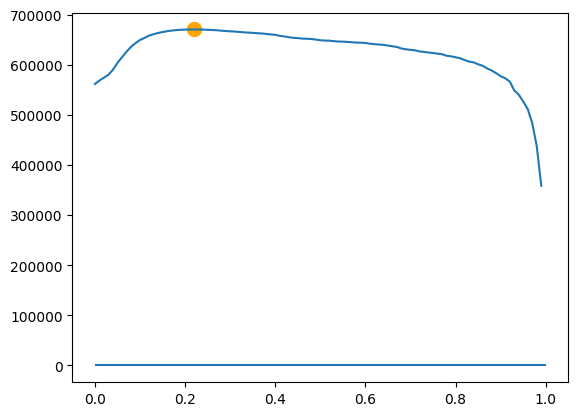

Maximum benefit at cutoff 0.22 with revenue delta of $670,609.25


In [294]:
rev_deltas = pd.Series({cutoff: get_rev_delta(test_data, cutoff=cutoff) for cutoff in np.arange(0, 1, 0.01)})
plot_tradeoff(rev_deltas)

**- Next step: How to select the discount**

In the strategy suggested by the SME division head we offer a 20% discount to all customers targeted. However, this might not be optimal either.

We assumed before that the customers offered a discount will not churn. However, that may not be true in reality. The discount may not be large enough to prevent churn.

In fact, we can predict the churn probability for each customer as a function of price, margin and other factors. Therefore, we can try to find a strategy for each customer that optimises either their expected revenue or profit.

In order to go further, we'll need to try to:

- Change the level of discount offered overall.
- Predict the response of customers to that discount (i.e the churn probability) based on how much that discount affects their price, the revenue and margin.
- Take care that we've applied the discount to all affected variables. To make this easier, we might want to retain our model using simpler set of variables where we know that we can factor the discount correctly into the predictors.
- Find the discount level that balances customer retention vs the cost of false positives.

In fact, this could be turned into a 2D optimisation problem:

• Objective: maximise net revenue (ie including the benefits of true positives and the cost of
false positives)

• Decision variables:

– Level of discount offered, and

– Fraction of people who are offered a discount

An even more sophisticated strategy is to find the right level of discount for each customer that maximises their predicted revenue or margin.